# Анализ тенденций игровой индустрии для планирования рекламной компании интернет-магазина «Стримчик»

**Описание проекта:**
    
Проект разработан для интернет-магазина "Стримчик", с целью обнаружения ключевых факторов, влияющих на успешность компьютерных игр. Воспользовавшись историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах, наш проект направлен на выявление закономерностей, способствующих коммерческому успеху игровых продуктов.

**Цель проекта:**

Цель проекта заключается в проведении всестороннего анализа исторических данных о продажах игр, оценках пользователей и экспертов, а также информации о жанрах и платформах, с целью выявления образующихся паттернов и закономерностей, влияющих на успешность компьютерных игр. 

**Описание данных:**

1. **Игры (games.csv):**
    - **Name** — название игры
    - **Platform** — платформа
    - **Year_of_Release** — год выпуска
    - **Genre** — жанр игры
    - **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
    - **EU_sales** — продажи в Европе (миллионы проданных копий)
    - **JP_sales** — продажи в Японии (миллионы проданных копий)
    - **Other_sales** — продажи в других странах (миллионы проданных копий)
    - **Critic_Score** — оценка критиков (максимум 100)
    - **User_Score** — оценка пользователей (максимум 10)
    - **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План работы :**
1. **Загрузка данных**
2. **Предобработка данных**
3. **Исследовательский анализ данных**
4. **Составление портрета пользователя каждого региона**
5. **Проверка гипотез**
6. **Общий вывод**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

### Загрузка данных

In [2]:
# Загрузим наши данные
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Посмотрим первичную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Взглянем на случайные 10 строк
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1213,Warcraft III: The Frozen Throne,PC,2003.0,Strategy,0.58,0.87,0.00,0.09,88.0,9,T
13608,Mechanic Escape,PS3,2012.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
7499,The King of Fighters '95,NG,1995.0,Fighting,0.00,0.00,0.20,0.00,NaN,NaN,NaN
2260,Starsky & Hutch,PS2,2003.0,Racing,0.45,0.35,0.00,0.12,NaN,NaN,NaN
4884,NBA Jam,PS3,2010.0,Sports,0.22,0.12,0.00,0.06,71.0,5.7,E
4956,Harry Potter: Quidditch World Cup,GBA,2003.0,Sports,0.28,0.10,0.00,0.01,53.0,8.3,E
14162,Tour de France 2014,PS4,2014.0,Sports,0.00,0.03,0.00,0.00,53.0,5.1,E
4736,Call of Duty: Advanced Warfare,PC,2014.0,Shooter,0.15,0.23,0.00,0.03,78.0,4.5,M
14918,Imagine: Sweet 16,DS,2010.0,Simulation,0.02,0.00,0.00,0.00,NaN,tbd,E
10576,Terraria,PSV,2013.0,Action,0.00,0.01,0.09,0.00,85.0,7.8,T


**Вывод :**

- Сразу видно, что названия солбцов нужно привести к нижнему регистру
- Тип данных в Year_of_Release стоит поменять на int
- Видно много пропусков в Critic_Score, User_Score, Rating.

### Предобработка данных

#### Замена названий столбцов

In [5]:
# Приведем к нижнему регистру названия столбцов
df.columns = df.columns.str.lower()

In [6]:
# Убедимся в изменениях
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод:**

- Названия столбцов приведены к нижнему регистру

#### Работа с пропусками

In [7]:
# Посмотрим, сколько пропущеннх значений имеется в каждом столбце
for column in df.columns:
    missing_values_count = df[column].isna().sum()
    if missing_values_count == 0:
        print(f"Столбец {column}: не имеет пропущенных значений")
    else:
        print(f"Столбец {column}: имеет {missing_values_count} пропущенных значений")

Столбец name: имеет 2 пропущенных значений
Столбец platform: не имеет пропущенных значений
Столбец year_of_release: имеет 269 пропущенных значений
Столбец genre: имеет 2 пропущенных значений
Столбец na_sales: не имеет пропущенных значений
Столбец eu_sales: не имеет пропущенных значений
Столбец jp_sales: не имеет пропущенных значений
Столбец other_sales: не имеет пропущенных значений
Столбец critic_score: имеет 8578 пропущенных значений
Столбец user_score: имеет 6701 пропущенных значений
Столбец rating: имеет 6766 пропущенных значений


In [8]:
#Посмотрим, сколько % пропущеннх значений имеется в каждом столбце
for column in df.columns:
    missing_values_count = df[column].isna().sum()
    missing_values_percentage =  (missing_values_count / df.shape[0] * 100).round(2)
    print(f"Столбец {column}: имеет {missing_values_percentage}% пропущенных значений")

Столбец name: имеет 0.01% пропущенных значений
Столбец platform: имеет 0.0% пропущенных значений
Столбец year_of_release: имеет 1.61% пропущенных значений
Столбец genre: имеет 0.01% пропущенных значений
Столбец na_sales: имеет 0.0% пропущенных значений
Столбец eu_sales: имеет 0.0% пропущенных значений
Столбец jp_sales: имеет 0.0% пропущенных значений
Столбец other_sales: имеет 0.0% пропущенных значений
Столбец critic_score: имеет 51.32% пропущенных значений
Столбец user_score: имеет 40.09% пропущенных значений
Столбец rating: имеет 40.48% пропущенных значений


In [9]:
# Посмотрим конкретно по столбцу genre
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# Посмотрим конкретно по столбцу name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данных строчках нет возможности заменить пропущенные значения, выбросимэти строки из датафрейма

In [11]:
# Предварительно посмотрим размерность таблицы
df.shape

(16715, 11)

In [12]:
# Удалим строки с пропусками в genre
df.dropna(how='any', inplace=True, subset=['genre'])

In [13]:
# Проверим размерность таблицы
df.shape

(16713, 11)

Столбец year_of_release: имеет 1.61% пропущенных значений. Удалим эти строки


In [14]:
# Выбросим строки
df.dropna(inplace=True, subset=['year_of_release'])

Пропуски в critic_score, user_score невозможно заменить или удалить, т.к. их очень много. Лучше оставить эти пропуски

Они вполне могли возникнуть из-за непопулярности игры, консоли , года выпуска. Не стоит отбрасывать и возможность технической неполадки при выгрузке данных. 

In [15]:
# Просмотрим строки со значением user_score = tbd
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Значение tbd означает 'подлежит уточнению', можно заменить эти значения на nan

In [16]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
# Проверим изменения
len(df[df['user_score'] == 'tbd'])

0

Заменим все пропуски в rating на 'Без рейтинга'

In [18]:
df['rating'].fillna('Без рейтинга', inplace=True)

**Вывод:**

- Удадлили строки с пропусками в genre, name
- Столбец year_of_release: имеет 1.61% пропущенных значений. Удалим эти строки
- Пропуски в critic_score, user_score оставили.
- Значение tbd в столбце user_score заменили на nan
- Пропуски в rating заменили на 'Без рейтинга'

#### Работа с дубликатами

In [19]:
# Проверим датафрейм на наличие явных дибликатов
df.duplicated().sum()

0

In [20]:
# Проверим столбец platform на наличие неявных пропусков
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
# Проверим столбец genre на наличие неявных пропусков
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Вывод:**

- В датафрейме нет явных дубликатов
- В датафрейме нет неявных дубликатов

#### Преобразование данных

In [22]:
# Преобразуем стобец year_of_release к типу int
df['year_of_release'] = df['year_of_release'].astype('int')

**Вывод:**

- Преобразовали стобец year_of_release к типу int

#### Подсчет суммарных продаж

In [23]:
# Создадим функцию, которая подсчитает суммарные продажи
def total_sales(row):
    tot = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return tot

In [24]:
# Создадим столбец
df['total_sales'] = df.apply(total_sales, axis=1)

In [25]:
# Проверим результат
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Без рейтинга,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Без рейтинга,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Без рейтинга,0.01


**Вывод:**

- Добавлен столбец total_sales с суммарными продажами

#### Вывод по предобработке данных

1. **Замена названий столбцов**

    - Названия столбцов приведены к нижнему регистру
    
2. **Работа с пропусками**

    - Удадлили строки с пропусками в genre, name
    - Столбец year_of_release: имеет 1.61% пропущенных значений. Удалили эти строки
    - Пропуски в critic_score, user_score оставили.
    - Значение tbd в столбце user_score заменили на nan
    - Пропуски в rating заменили на 'Без рейтинга'
    
3. **Работа с дубликатами**

    - В датафрейме нет явных дубликатов
    - В датафрейме нет неявных дубликатов
    
4. **Подсчет суммарных продаж**

    - Добавлен столбец total_sales с суммарными продажами

### Исследовательский анализ данных

#### Количество игр в разные годы

In [26]:
year_data = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
year_data.columns = ['count']

In [27]:
year_data

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [28]:
# Посмотрим статистику
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

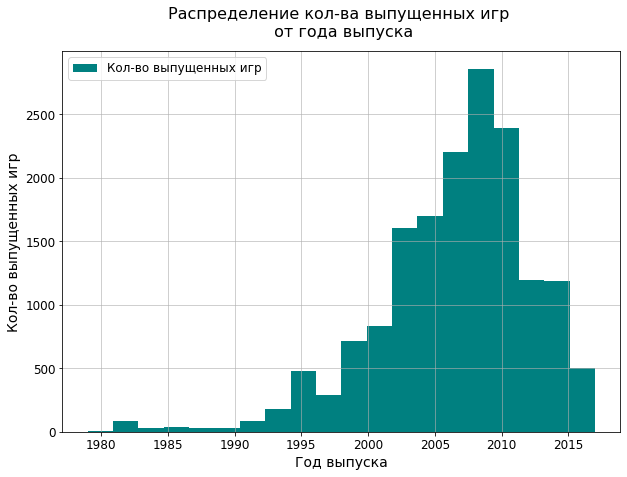

In [29]:
#Посмотрим на распределение
df['year_of_release'].hist(bins=20, range=(1979,2017), figsize=(10,7), color='teal')

plt.title('Распределение кол-ва выпущенных игр \n от года выпуска', fontsize=16, pad=15)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Кол-во выпущенных игр', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Кол-во выпущенных игр'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()

**Вывод :**
- С 2003 по 2016 год выпускалось наибольшее кол-во игр
- Максимум наблюдался в 2008 - 1427 игр

#### Динамика продаж игр по платформам

In [30]:
# Создадим сводную таблицу
platform_sales = df.pivot_table(index=('platform', 'year_of_release'), values='total_sales', aggfunc='sum')
platform_sales

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

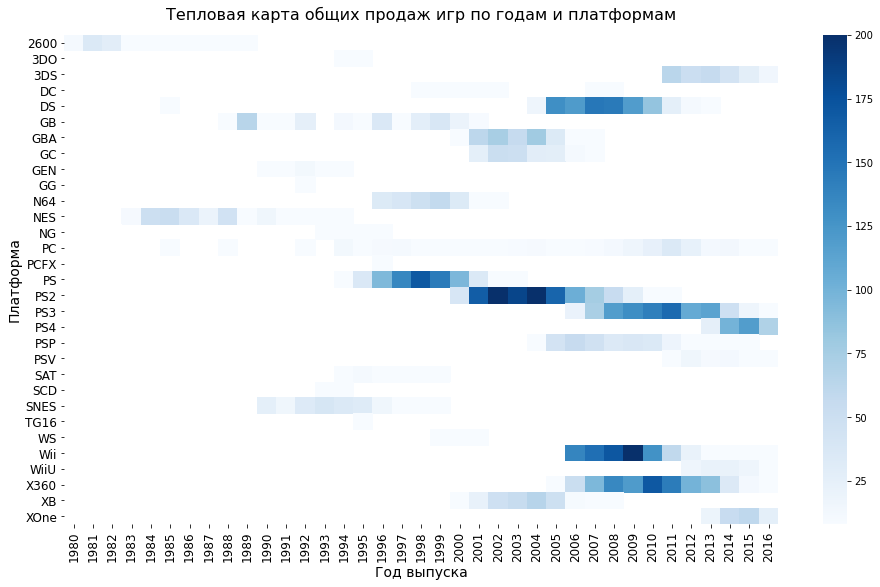

In [31]:
# Можно представить в виде тепловой карты
plt.figure(figsize=(16, 9))
(sns
    .heatmap(
        platform_sales['total_sales'].unstack(level='platform').T, 
        annot=False, 
        cmap='Blues', 
        vmin=8, 
        vmax=200)
)

plt.ylabel('Платформа', fontsize=14) 
plt.xlabel('Год выпуска', fontsize=14)  
plt.title('Тепловая карта общих продаж игр по годам и платформам', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [32]:
# Посмотрим на какие платформы приходится наибольшее кол-во общих продаж
platform_final_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
# Выберем топ 5 по продажам
platform_top = platform_final_sales.sort_values(by='total_sales', ascending=False).head(5)

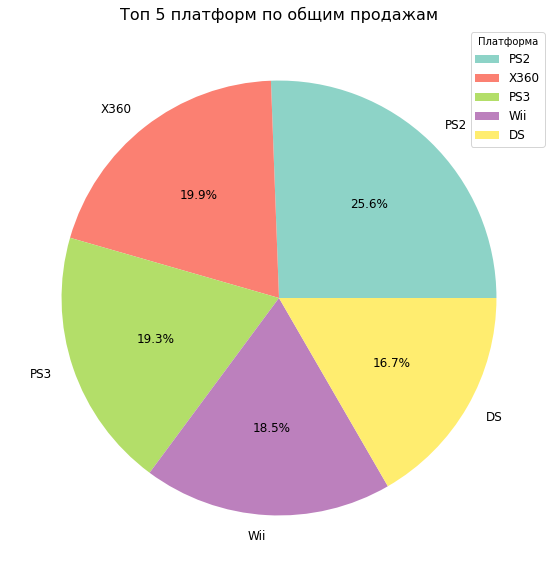

In [33]:
#Генерация цветовой палитры
num_platform_top = len(platform_top)
color_map_platform_top = plt.cm.get_cmap('Set3', num_platform_top)
bar_colors_platform_top = [color_map_platform_top(i) for i in np.linspace(0, 1, num_platform_top)]

#Создание круговой диаграммы
plt.figure(figsize=(14, 10))
plt.pie(platform_top['total_sales'], labels=platform_top.index, autopct='%.1f%%', colors=bar_colors_platform_top, textprops={'fontsize': 12})
plt.title('Топ 5 платформ по общим продажам', fontsize=16)
plt.legend(platform_top.index, title='Платформа', loc='best', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

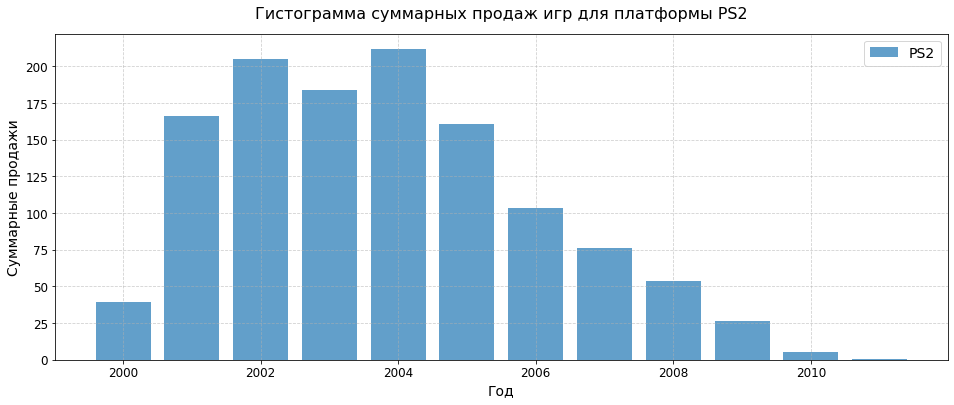

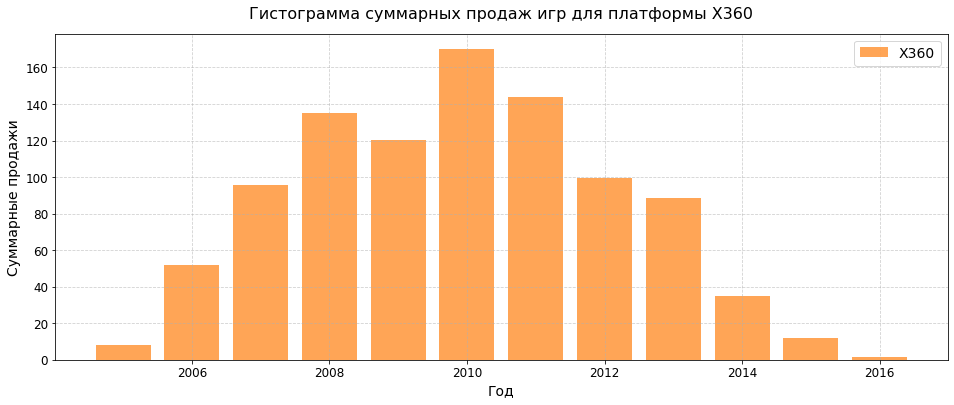

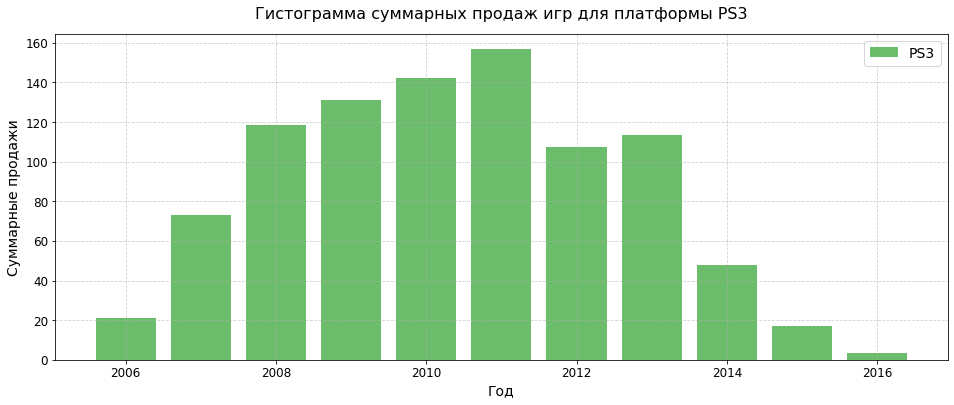

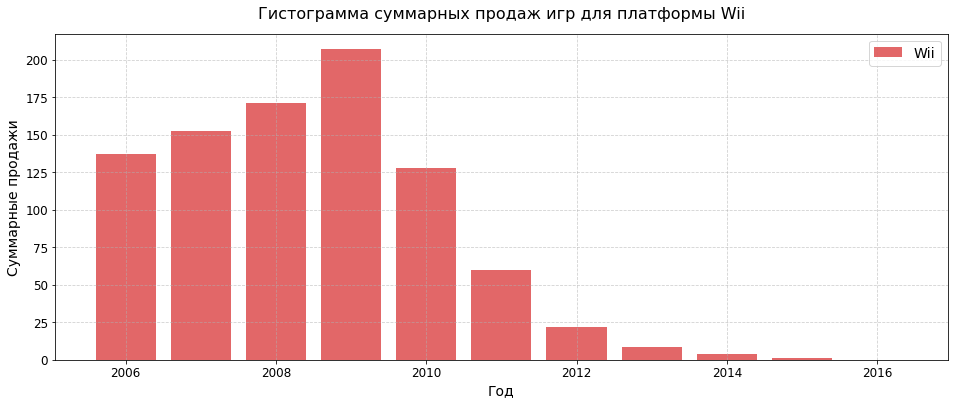

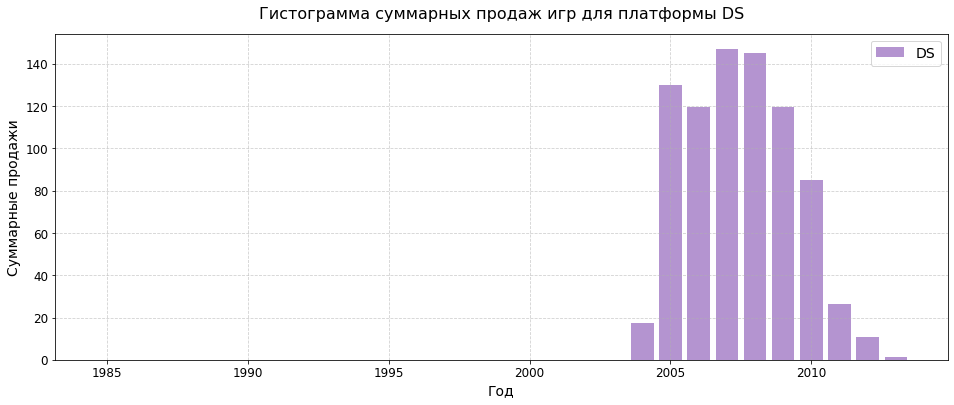

In [34]:
# Построим распределения по годам для топовых платформ
colors = plt.cm.tab10(range(len(platform_top.index)))
for platform in platform_top.index:
    platf_plot = platform_sales.loc[platform].index.get_level_values('year_of_release')
    sales_counts = platform_sales.loc[platform]['total_sales']
    platform_color = plt.cm.tab10(platform_top.index.to_list().index(platform))
    
    plt.figure(figsize=(16, 6))
    plt.bar(platf_plot, sales_counts, color=platform_color, alpha=0.7, label=platform)
    plt.xlabel('Год', fontsize=14)
    plt.ylabel('Суммарные продажи', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.title(f'Гистограмма суммарных продаж игр для платформы {platform}', fontsize=16, pad=15)
    plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Вывод :**

- Продажи игр на PS2 стартовали в 2000 и закончились в 2011, максимум в 2004 году
- Продажи игр на Х360 стартовали в 2005 и падают с 2010, минимум в 2016 году
- Продажи игр на PS3 стартовали в 2006 и падают с 2011, минимум в 2016 году
- Продажи игр на DS стартовали в 2004 и закончились в 2013
- Продажи игр на Wii стартовали в 2006 и падают с 2009, продажи закончились в 2015 году

Данные платформы живут от 9 до 11 лет

#### Динамика выпуска игр по платформам

In [35]:
# Создадим отдельную переменную
platform_data = df['platform'].value_counts()

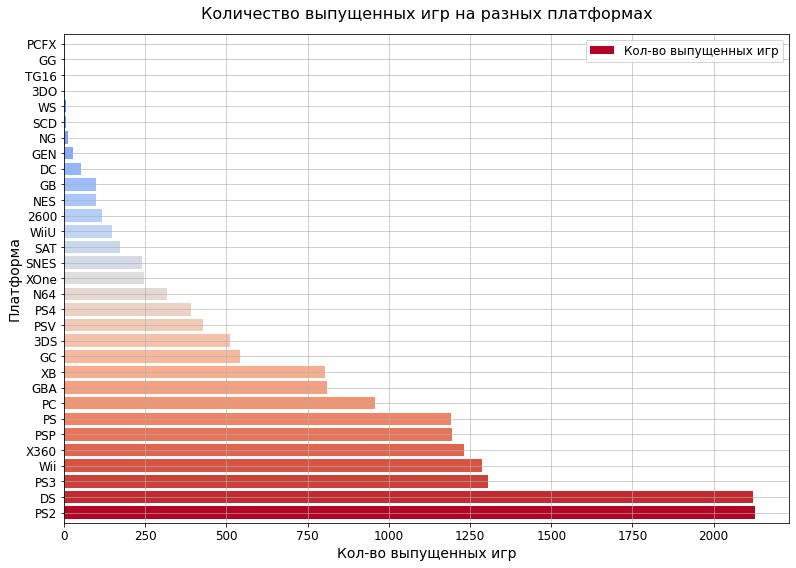

In [36]:
#Генерация градиента цветов для столбиков
num_bars_platform = len(platform_data)
color_map_platform = plt.cm.get_cmap('coolwarm', num_bars_platform).reversed()  
#Создание списка цветов на основе градиента
bar_colors_platform = [color_map_platform(i) for i in np.linspace(0, 1, num_bars_platform)]



# Посмотрим на диаграмму
(platform_data
    .plot(
        kind='barh',
        figsize=(13, 9),
        width=0.8,
        color=bar_colors_platform)
)

plt.title('Количество выпущенных игр на разных платформах', fontsize=16, pad=15)
plt.ylabel('Платформа', fontsize=14) 
plt.xlabel('Кол-во выпущенных игр', fontsize=14)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Кол-во выпущенных игр'], fontsize=12)
plt.grid(True, alpha=0.75)

plt.show()


**Вывод :**

- PS2 и DS лидируют со значительным отрывом
- PC, PS, PSP, X360, Wii, PS3 имеют большое кол-во продаж игр
- XB и GBA немного отстают

In [37]:
# Создадим сводную таблицу
platform_by_year = df.pivot_table(
            index='platform', 
            columns='year_of_release', 
            aggfunc='size', 
            fill_value=0)

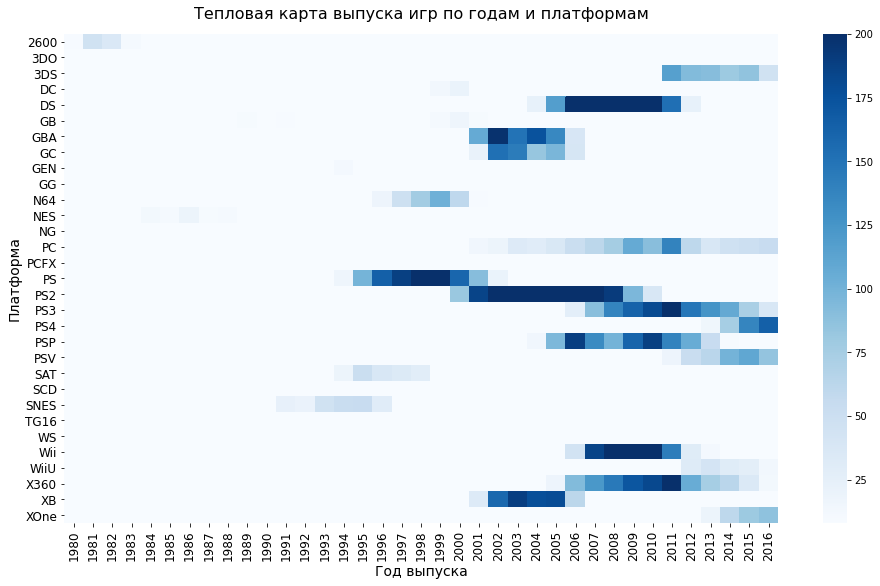

In [38]:
# Можно представить в виде тепловой карты
plt.figure(figsize=(16, 9))
(sns
    .heatmap(
        platform_by_year, 
        annot=False, 
        cmap='Blues', 
        vmin=8, 
        vmax=200)
)

plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Платформа', fontsize=14)
plt.title('Тепловая карта выпуска игр по годам и платформам', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

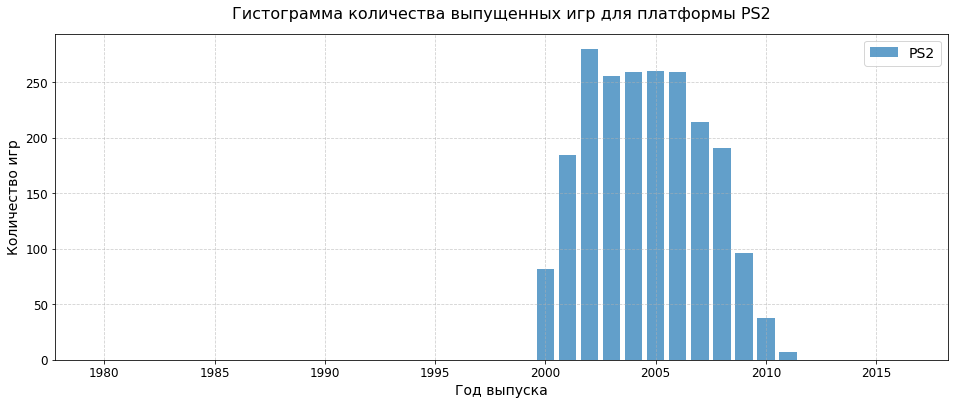

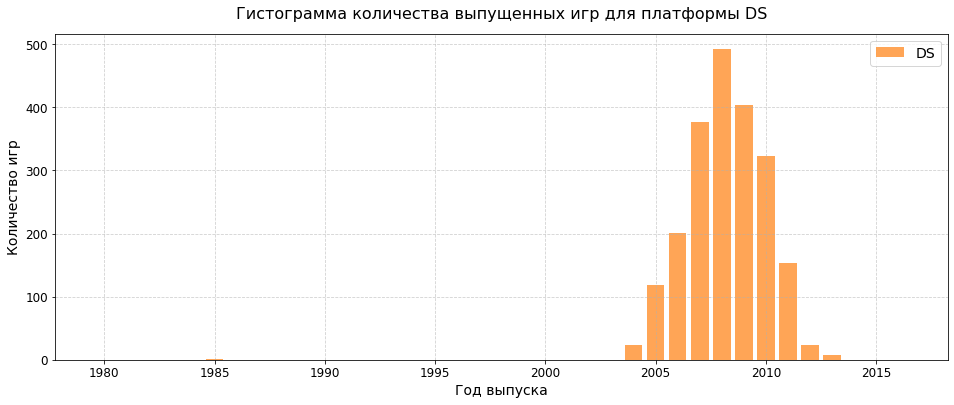

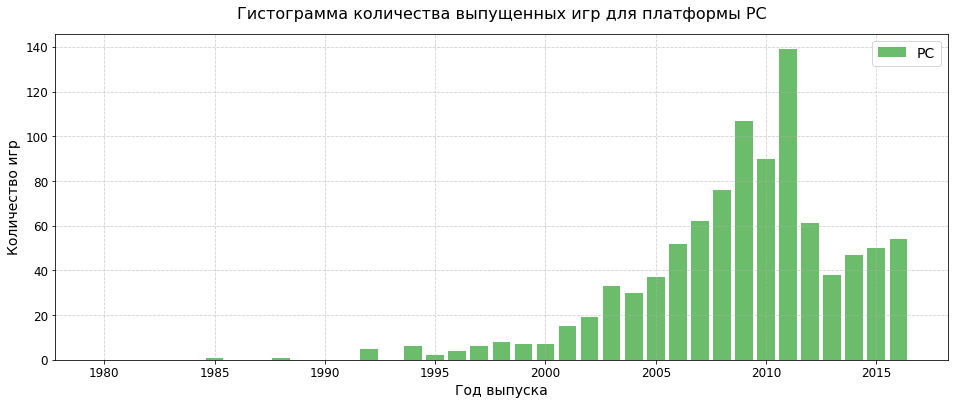

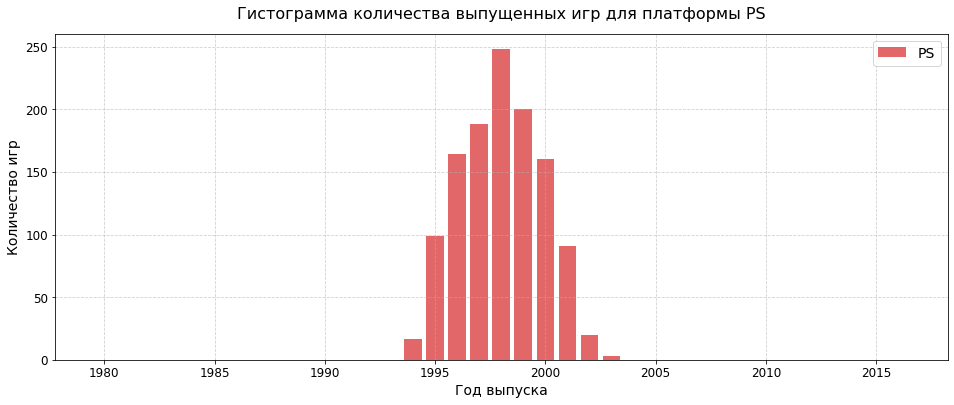

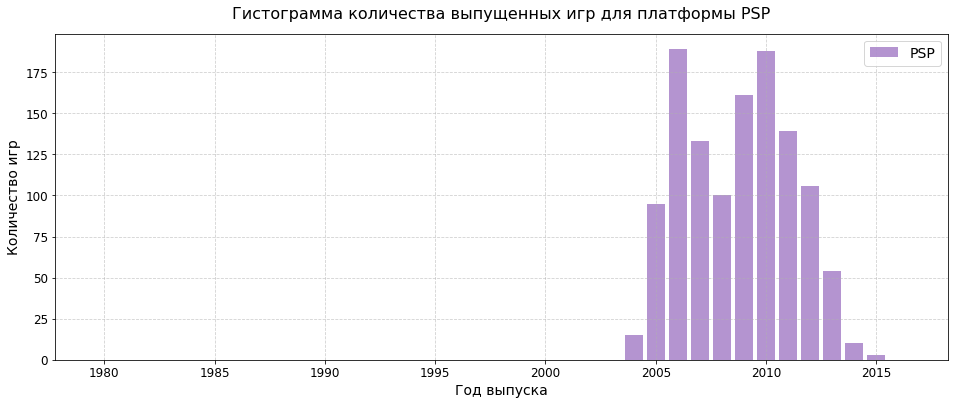

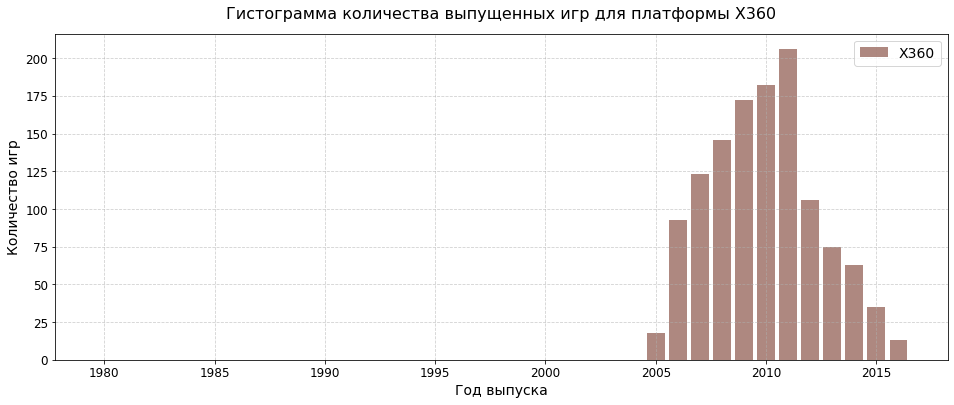

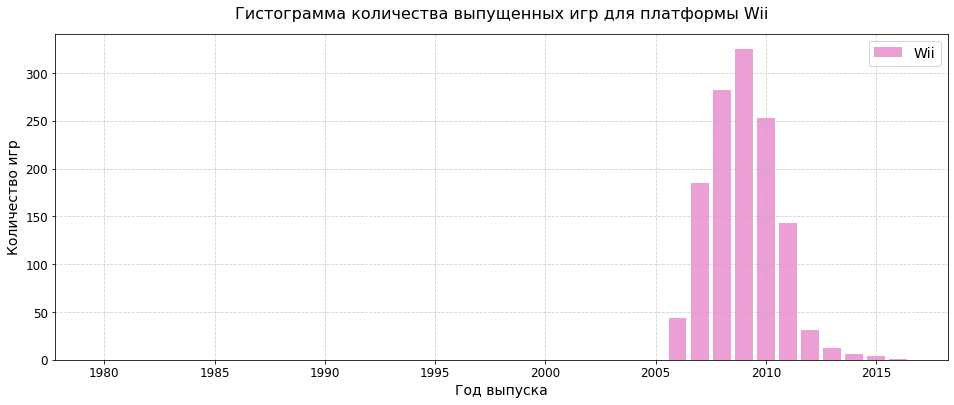

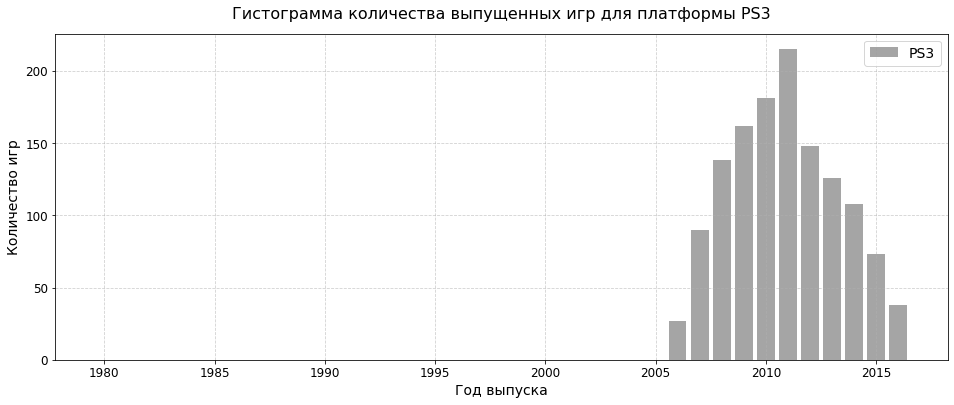

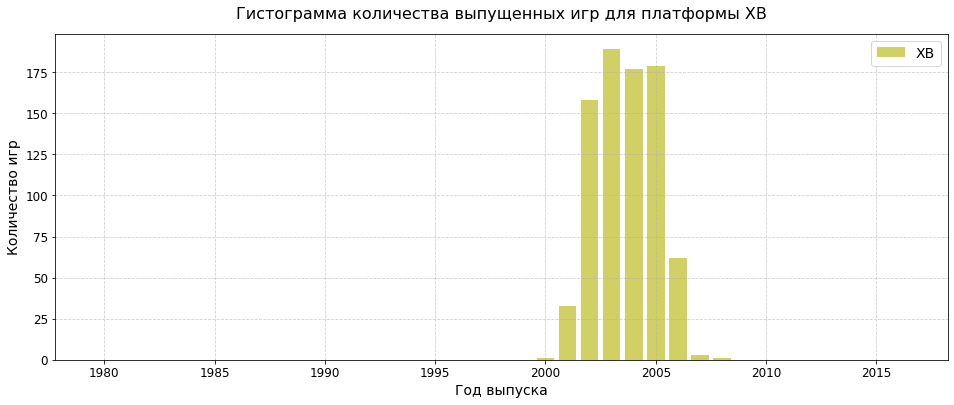

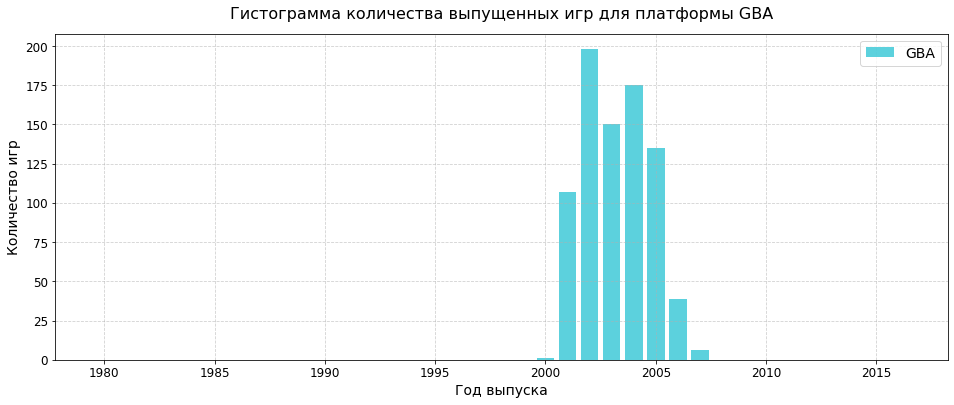

In [39]:
# Построим распределения по годам для топовых платформ
platform_list = ["PS2", "DS", "PC", "PS", "PSP", "X360", "Wii", "PS3", "XB", "GBA"]
colors = plt.cm.tab10(range(len(platform_list)))
for platform in platform_list:
    platf_plot = platform_by_year.query('platform == @platform')
    years = platf_plot.columns.tolist()
    game_counts = platf_plot.values.tolist()[0]
    colors = plt.cm.tab10(platform_list.index(platform))
    
    plt.figure(figsize=(16, 6))
    plt.bar(years, game_counts, color=colors, alpha=0.7, label=platform)
    plt.xlabel('Год выпуска', fontsize=14)
    plt.ylabel('Количество игр', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.title(f'Гистограмма количества выпущенных игр для платформы {platform}', fontsize=16, pad=15)
    plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Вывод :**

- Выпуск игр на PS2 стартовал в 2000 и закончился в 2011
- Выпуск игр на DS стартовал в 2004 и закончился в 2013
- Выпуск игр на PC стартовал в 1985 и не закончился до сих пор
- Выпуск игр на PS стартовал в 1994 и закончился в 2003
- Выпуск игр на PSP стартовал в 2004 и резко упал в 2015
- Выпуск игр на Х360 стартовал в 2005 и падает с 2011
- Выпуск игр на Wii стартовал в 2006 и падает с 2009
- Выпуск игр на PS3 стартовал в 2006 и падает с 2011
- Выпуск игр на ХВ стартовал в 2000 и закончился в 2007
- Выпуск игр на GBA стартовал в 2000 и закончился в 2007

#### Выбор актуального периода

Актуальным периодом будем считать данные с 2013 года, чтобы отбросить прошлые тенденции и взять только актуальную информацию.

In [40]:
# Создадим новый датафрейм
df_actual = df.query('year_of_release >= 2013')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Без рейтинга,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Без рейтинга,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Без рейтинга,0.01


#### Лидирующие платформы

In [41]:
# Для наглядности представим в виде сводной таблицы
actual_platform_by_year = df_actual.pivot_table(
            index='platform', 
            columns='year_of_release',
            values='total_sales',
            aggfunc='sum', 
            fill_value=0)
actual_platform_by_year

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,0.00,0.00,0.00
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,0.00
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


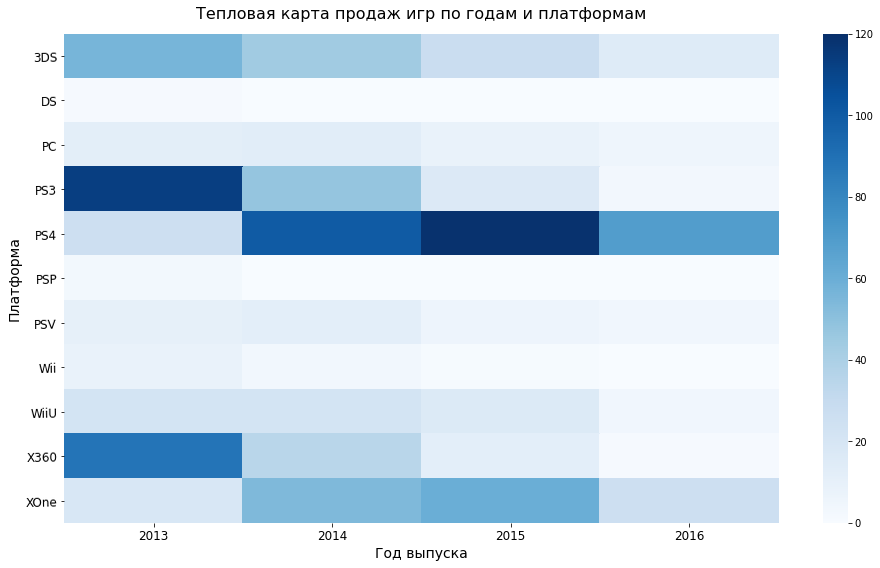

In [42]:
# Можно представить в виде тепловой карты
plt.figure(figsize=(16, 9))
(sns
    .heatmap(
        actual_platform_by_year, 
        annot=False, 
        cmap='Blues', 
        vmin=0, 
        vmax=120)
)

plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Платформа', fontsize=14)
plt.title('Тепловая карта продаж игр по годам и платформам', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=1)
plt.show()

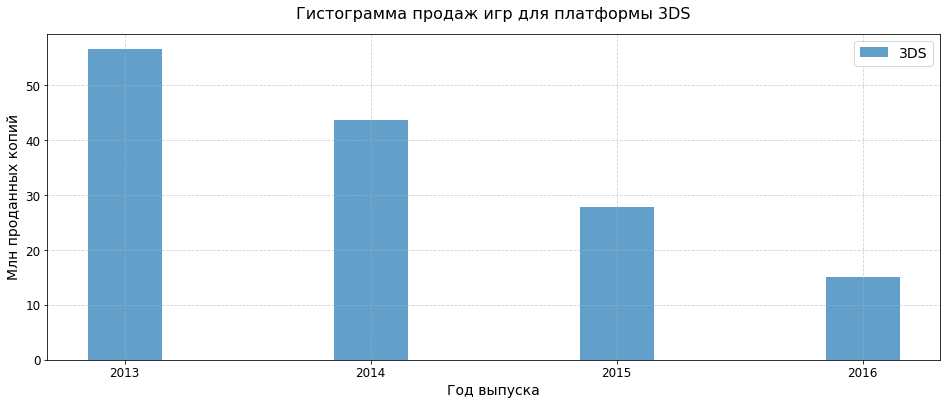

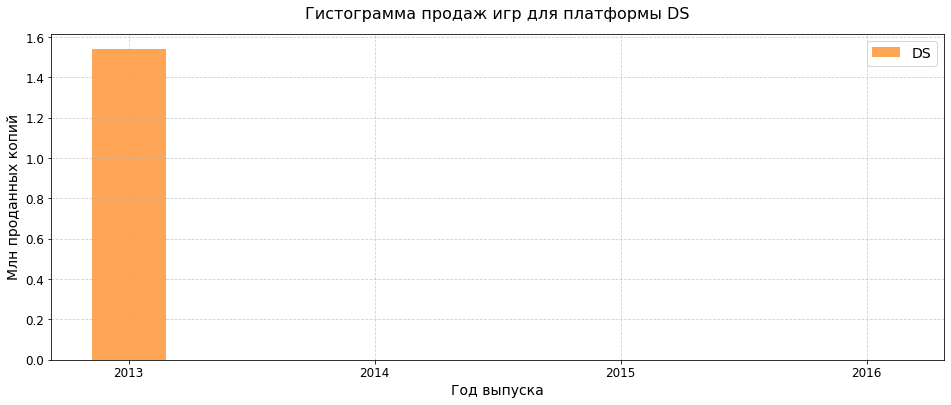

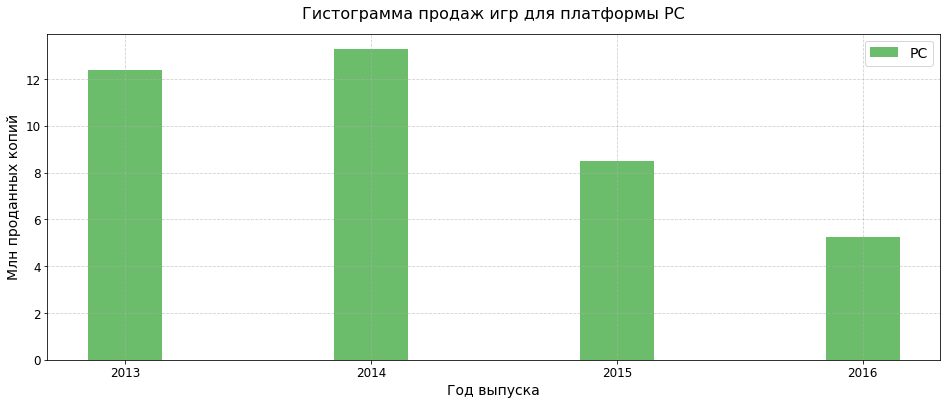

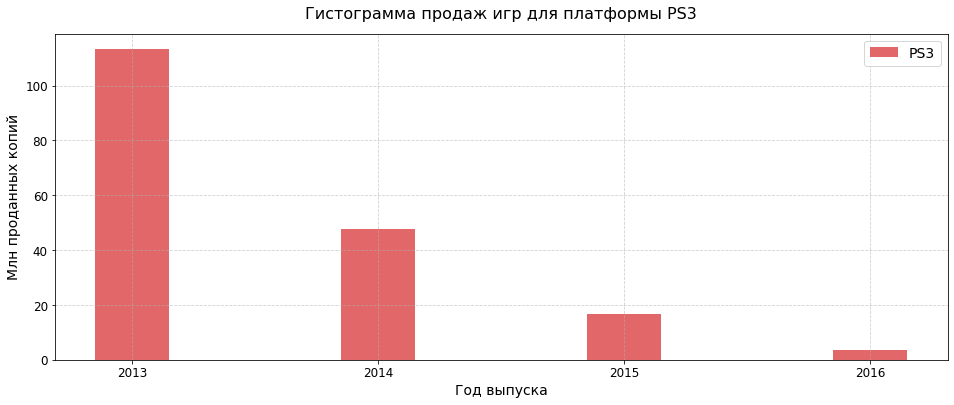

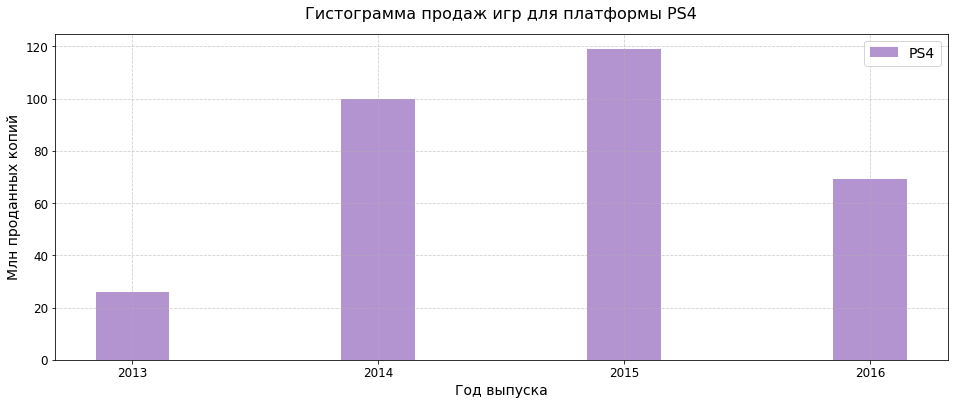

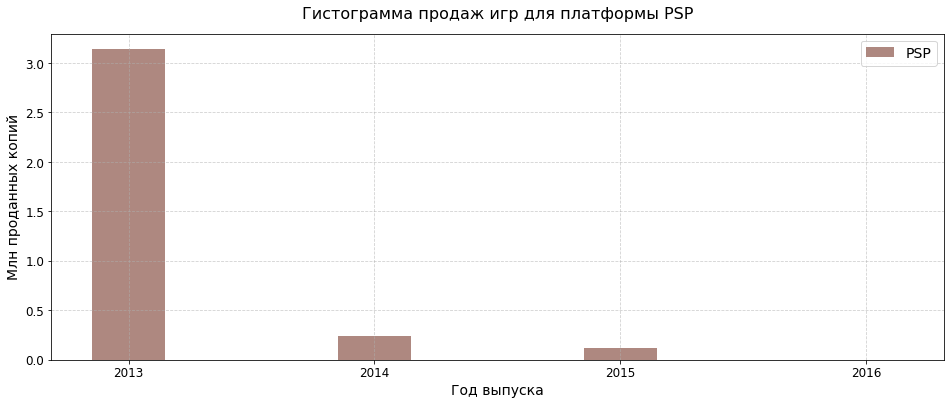

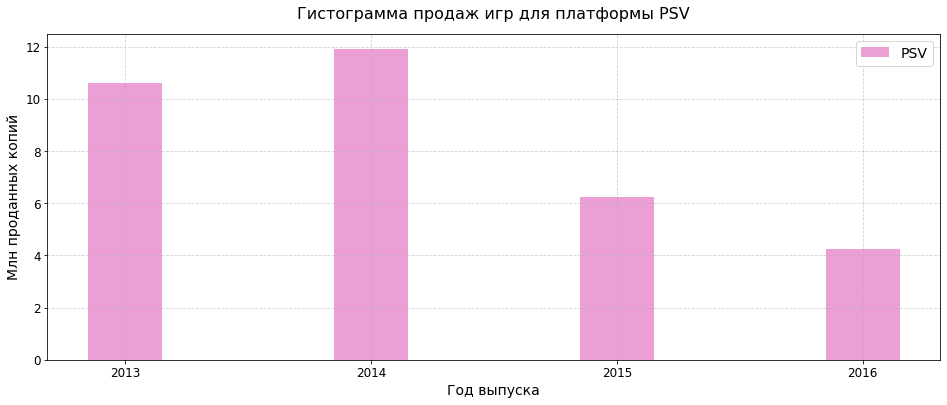

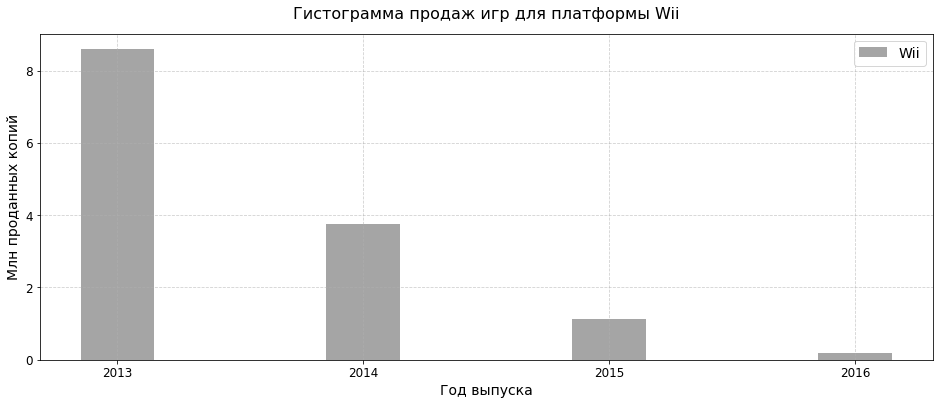

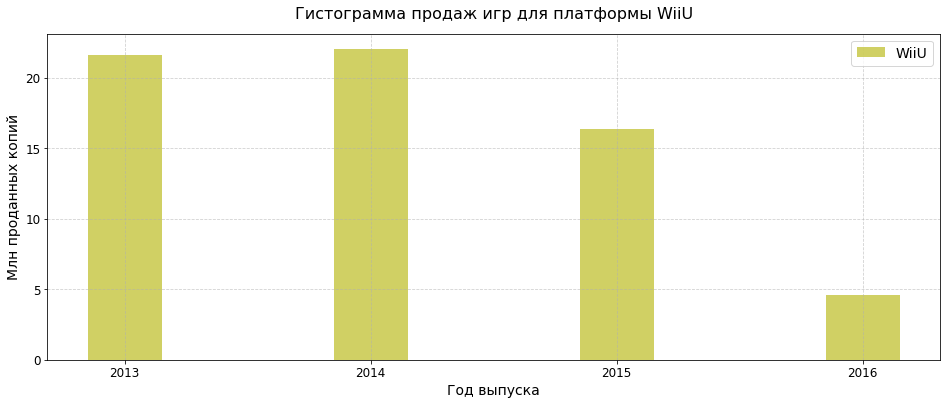

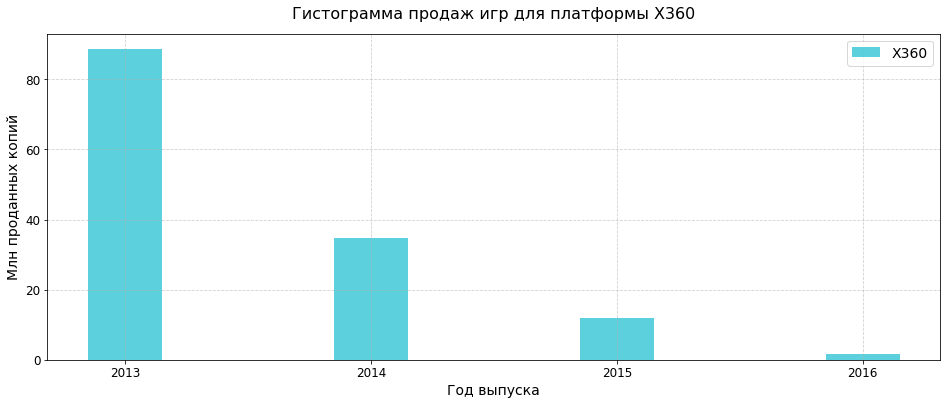

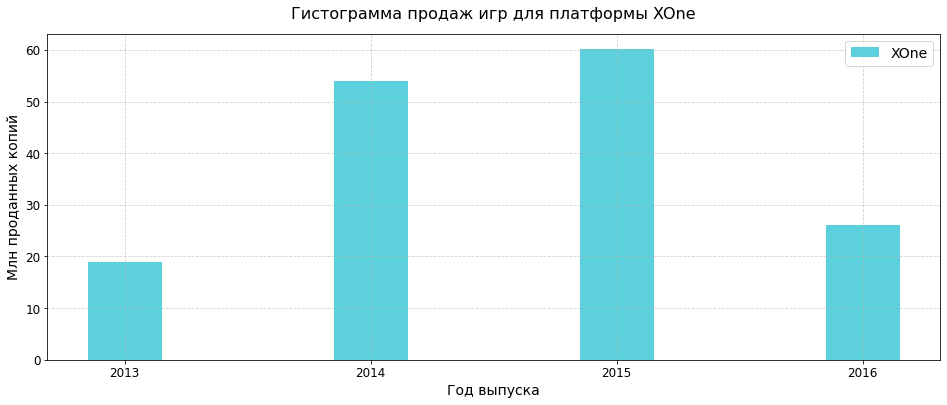

In [43]:
colors = plt.cm.tab10(range(len(actual_platform_by_year.index)))
platform_index = 0  # Счетчик индекса платформы
for platform in actual_platform_by_year.index:
    platf_plot = actual_platform_by_year.query('platform == @platform')
    years = actual_platform_by_year.columns.tolist()
    game_counts = actual_platform_by_year.loc[platform].tolist()
    color = colors[platform_index]
    platform_index += 1
    
    plt.figure(figsize=(16, 6))
    plt.bar(years, game_counts, color=color, alpha=0.7, label=platform, width=0.3)  # Уменьшаем ширину баров
    plt.xlabel('Год выпуска', fontsize=14)
    plt.ylabel('Млн проданных копий', fontsize=14)
    plt.xticks(years, rotation=0, fontsize=12)  # Устанавливаем метки на оси x и поворачиваем их
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.title(f'Гистограмма продаж игр для платформы {platform}', fontsize=16, pad=15)
    plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Вывод :**
- Наибольший интерес представляют PS4 и XOne в связи со своей положительной динамикой и лидирующими позициями по продажам
- X360, WiiU, Wii, PSP, PS3, 3DS, PSV имеют отрицательную динамику

#### Оценка статистики продаж по диаграммам размаха

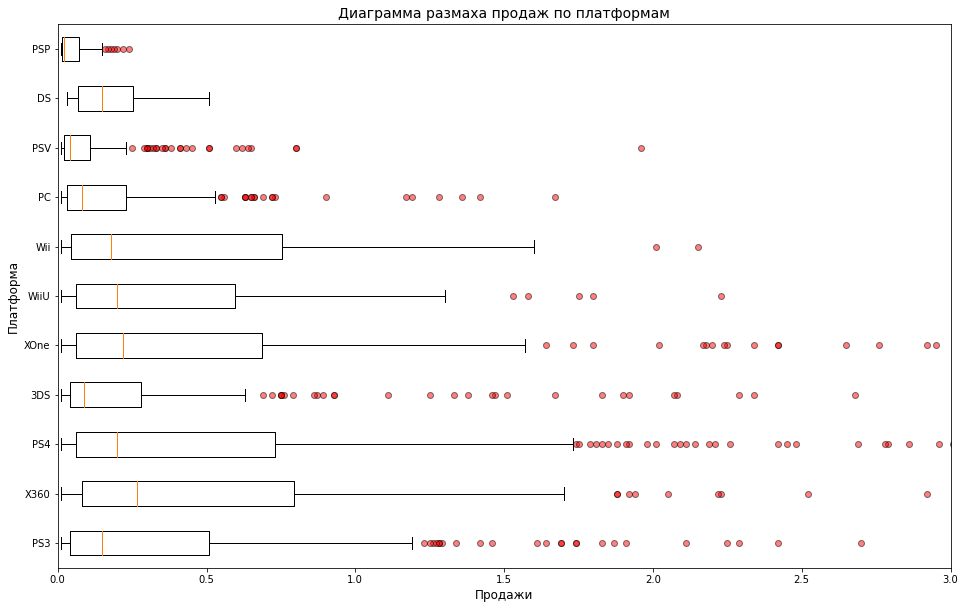

In [44]:
# Построим диаграмму размаха
plt.figure(figsize=(16, 10))
data_to_plot = []
platform_labels = []

for platform in df_actual['platform'].unique():
    box_data = df_actual.query('platform == @platform')['total_sales']
    data_to_plot.append(box_data)
    platform_labels.append(platform)

# Создаем диаграмму размаха без выбросов
boxplot = plt.boxplot(data_to_plot, 
                      labels=platform_labels, 
                      vert=False, 
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6)
                      )

plt.xlabel('Продажи', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.title('Диаграмма размаха продаж по платформам', fontsize=14)

# Добавляем красные точки только на местах с выбросами
for flier in boxplot['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
plt.xlim(0, 3)
plt.show()

In [45]:
# Посмотрим статистику 
for platform in df_actual['platform'].unique():
    box_data = df_actual.query('platform == @platform')['total_sales']
    print(f'Статистика по платформе {platform} \n \n {box_data.describe()} \n')

Статистика по платформе PS3 
 
 count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64 

Статистика по платформе X360 
 
 count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64 

Статистика по платформе PS4 
 
 count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64 

Статистика по платформе 3DS 
 
 count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64 

Статистика по платформе XOne 
 
 count    247.000000
mean       0.645020
std        1.0

**Вывод :**

- Медиана глобальных продаж игр на WiiU, Wii, DS, XOne, PS4, PS3 очень близка и находится в диапазоне [0.15; 0.22]
- Медиана глобальных продаж игр на PSP, PSV, PC наименьшая 0.02, 0.04 и 0.08 соответственно
- Медиана глобальных продаж игр на X360 наибольшая - 0.265

#### Влияние отзывов пользователей и критиков на продажи внутри платформы PS4

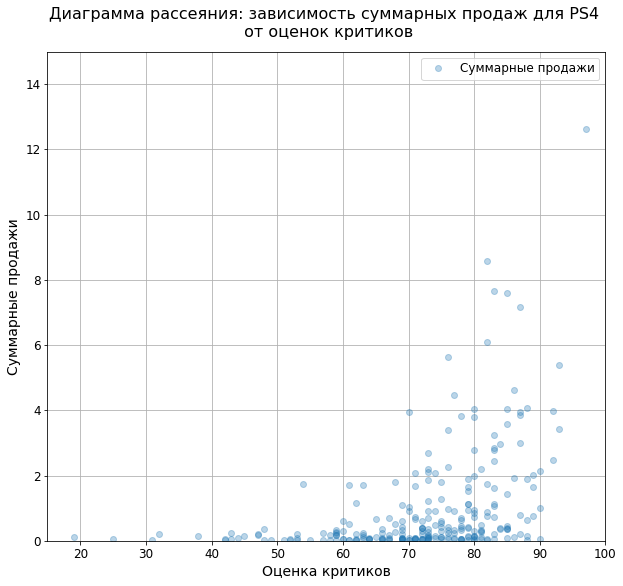

In [46]:
# Посмотрим как влияют на продажи внутри платформы PS4 отзывы критиков
x = df_actual.dropna().query('platform == "PS4"')['critic_score']
y = df_actual.dropna().query('platform == "PS4"')['total_sales']

# Построение графика
plt.figure(figsize=(10, 9))
plt.plot(x, y, 'o', label='Суммарные продажи', alpha=0.3)

plt.xlim(15, 100)
plt.ylim(0, 15)
plt.title('Диаграмма рассеяния: зависимость суммарных продаж для PS4 \n от оценок критиков', fontsize=16, pad=15)
plt.xlabel('Оценка критиков', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [47]:
print("Корреляция между суммарными продажами и отзывами критиков:", x.corr(y))

Корреляция между суммарными продажами и отзывами критиков: 0.40589480145836687


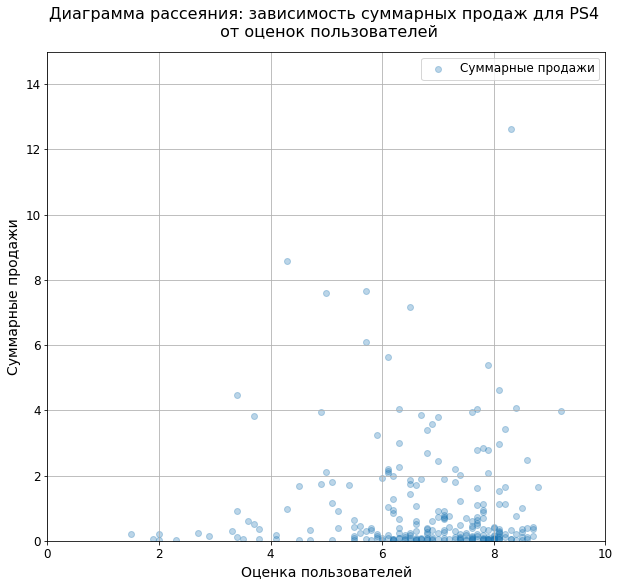

In [48]:
# Посмотрим как влияют на продажи внутри платформы PS4 отзывы пользователей
x = df_actual.dropna().query('platform == "PS4"')['user_score'].astype(float)
y = df_actual.dropna().query('platform == "PS4"')['total_sales']

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 9))
plt.scatter(x, y, label='Суммарные продажи', alpha=0.3)

plt.xlim(0, 10)
plt.ylim(0, 15)
plt.title('Диаграмма рассеяния: зависимость суммарных продаж для PS4 \n от оценок пользователей', fontsize=16, pad=15)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()



In [49]:
print("Корреляция между суммарными продажами и отзывами пользователей:", x.corr(y))

Корреляция между суммарными продажами и отзывами пользователей: -0.03362497596528878


**Вывод :**

- Видна корреляция между суммарными продажами и отзывами критиков внутри платформы PS4: 0.4
- Зависимости не проглядывается до оценок критиков = 50, затем видно явное повышение количества крупных продаж игр
- Корреляции между суммарными продажами и отзывами пользователей внутри платформы PS4 нет : -0.03
- Крупных продаж игр с пользовательскими оценками выше 4 значительно больше
- Основные продажи находятся в области с пользовательскими оценками [6:8] и в области с оценками критиков [60:90]

#### Влияние отзывов пользователей и критиков на продажи внутри платформы XOne

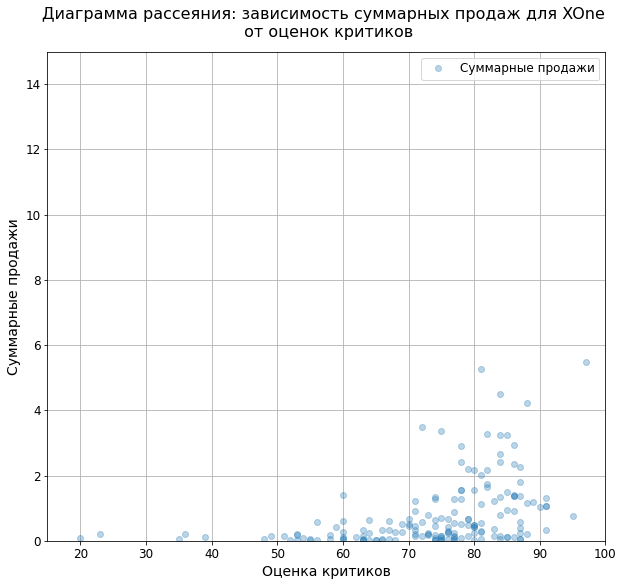

In [50]:
# Посмотрим как влияют на продажи внутри платформы XOne отзывы критиков
x = df_actual.dropna().query('platform == "XOne"')['critic_score']
y = df_actual.dropna().query('platform == "XOne"')['total_sales']

# Построение графика
plt.figure(figsize=(10, 9))
plt.plot(x, y, 'o', label='Суммарные продажи', alpha=0.3)

plt.xlim(15, 100)
plt.ylim(0, 15)
plt.title('Диаграмма рассеяния: зависимость суммарных продаж для XOne \n от оценок критиков', fontsize=16, pad=15)
plt.xlabel('Оценка критиков', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [51]:
print("Корреляция между суммарными продажами и отзывами критиков:", x.corr(y))

Корреляция между суммарными продажами и отзывами критиков: 0.41042203561296375


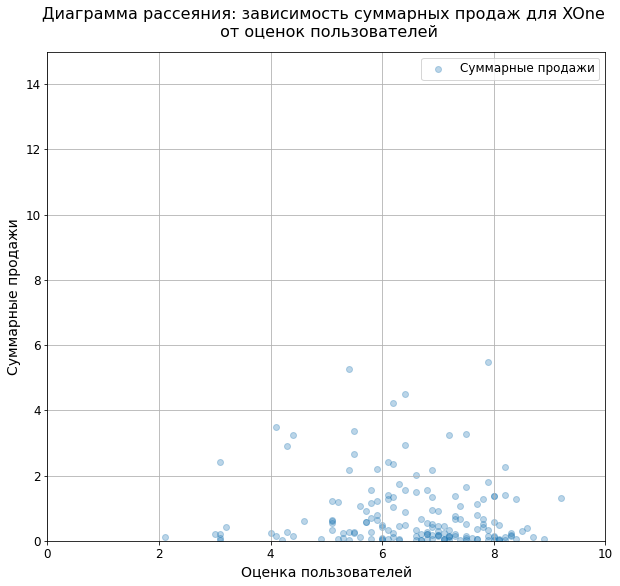

In [52]:
# Посмотрим как влияют на продажи внутри платформы XOne отзывы пользователей
x = df_actual.dropna().query('platform == "XOne"')['user_score'].astype(float)
y = df_actual.dropna().query('platform == "XOne"')['total_sales']

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 9))
plt.scatter(x, y, label='Суммарные продажи', alpha=0.3)

plt.xlim(0, 10)
plt.ylim(0, 15)
plt.title('Диаграмма рассеяния: зависимость суммарных продаж для XOne \n от оценок пользователей', fontsize=16, pad=15)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [53]:
print("Корреляция между суммарными продажами и отзывами пользователей:", x.corr(y))

Корреляция между суммарными продажами и отзывами пользователей: -0.09400318326920852


**Вывод :**

- Видна корреляция между суммарными продажами и отзывами критиков внутри платформы XOne: 0.41
- Зависимости не проглядывается до оценок критиков = 50, затем видно явное повышение количества крупных продаж игр
- Корреляции между суммарными продажами и отзывами пользователей внутри платформы XOne нет : -0.09
- Крупных продаж игр с пользовательскими оценками выше 4 значительно больше
- Основные продажи находятся в области с пользовательскими оценками [6:8] и в области с оценками критиков [60:90]

#### Влияние отзывов пользователей и критиков на продажи внутри платформы 3DS

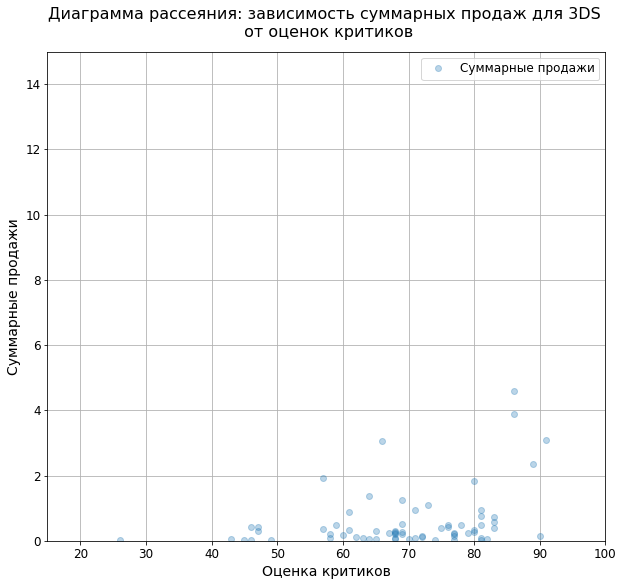

In [54]:
# Посмотрим как влияют на продажи внутри платформы 3DS отзывы критиков
x = df_actual.dropna().query('platform == "3DS"')['critic_score']
y = df_actual.dropna().query('platform == "3DS"')['total_sales']

# Построение графика
plt.figure(figsize=(10, 9))
plt.plot(x, y, 'o', label='Суммарные продажи', alpha=0.3)

plt.xlim(15, 100)
plt.ylim(0, 15)
plt.title('Диаграмма рассеяния: зависимость суммарных продаж для 3DS \n от оценок критиков', fontsize=16, pad=15)
plt.xlabel('Оценка критиков', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [55]:
print("Корреляция между суммарными продажами и отзывами критиков:", x.corr(y))

Корреляция между суммарными продажами и отзывами критиков: 0.3392349287853147


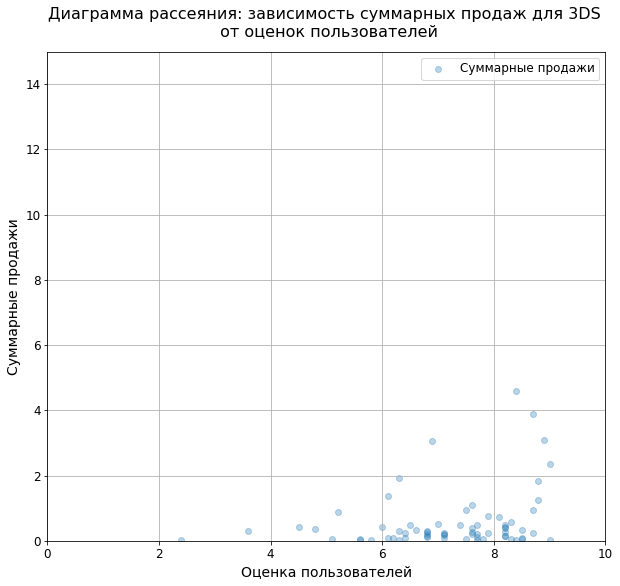

In [56]:
# Посмотрим как влияют на продажи внутри платформы XOne отзывы пользователей
x = df_actual.dropna().query('platform == "3DS"')['user_score'].astype(float)
y = df_actual.dropna().query('platform == "3DS"')['total_sales']

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 9))
plt.scatter(x, y, label='Суммарные продажи', alpha=0.3)

plt.xlim(0, 10)
plt.ylim(0, 15)
plt.title('Диаграмма рассеяния: зависимость суммарных продаж для 3DS \n от оценок пользователей', fontsize=16, pad=15)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Суммарные продажи', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [57]:
print("Корреляция между суммарными продажами и отзывами пользователей:", x.corr(y))

Корреляция между суммарными продажами и отзывами пользователей: 0.2729904366942444


**Вывод :**

- Видна корреляция между суммарными продажами и отзывами критиков внутри платформы 3DS: 0.34
- Зависимости не проглядывается до оценок критиков = 50, затем видно явное повышение количества крупных продаж игр
- Видна слабая корреляция между суммарными продажами и отзывами пользователей внутри платформы 3DS : 0.27
- Крупных продаж игр с пользовательскими оценками выше 5 значительно больше
- Основные продажи находятся в области с пользовательскими оценками [6:8] и в области с оценками критиков [60:90]


Так как выводы между тремя платформами почти совпадают, будем считать, что эти выводы можно экстраполировать и на другие платформы

#### Общее распределение игр по жанрам

In [58]:
# Сосздадим сводную таблицу по жанрам  общим продажам
pivot_table_genre = (df_actual
                     .pivot_table(
                         index='genre', 
                         values='total_sales', 
                         aggfunc='median')
                     .sort_values(
                         by='total_sales', 
                         ascending=False)
)
pivot_table_genre

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


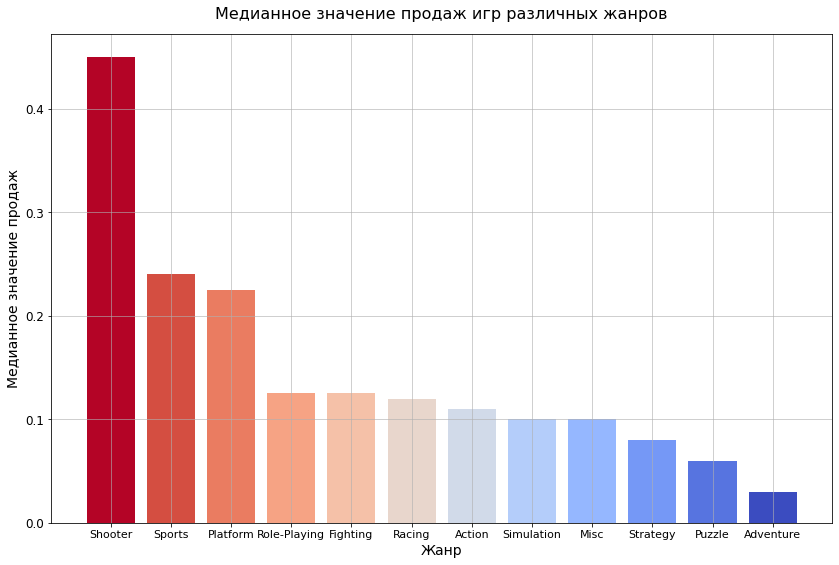

In [59]:

# Генерация градиента цветов для столбиков
num_bars_genre = len(pivot_table_genre)
color_map_genre = plt.cm.get_cmap('coolwarm', num_bars_genre).reversed() 
# Создание списка цветов на основе градиента
bar_colors_genre = [color_map_genre(i) for i in np.linspace(0, 1, num_bars_genre)]

plt.figure(figsize=(14, 9))
plt.bar(range(len(pivot_table_genre)), pivot_table_genre['total_sales'], color=bar_colors_genre)
plt.title('Медианное значение продаж игр различных жанров', fontsize=16, pad=15)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Медианное значение продаж', fontsize=14)
plt.xticks(range(len(pivot_table_genre)), pivot_table_genre.index, rotation=0, fontsize=11)
plt.yticks(fontsize=12)
plt.grid(alpha=0.75)
plt.show()

**Вывод :**

- Самыми прибыльными жанрами оказались : 
    - Shooter - 0.45 млн 
    - Sports - 0.240 млн
    - Platform - 0.225 млн 
    
Данные жанры значительно опережают остальные, что говорит о большом интересе пользователей к этим жанрам игр
- Жанры с наименьшим количеством продаж:
    - Adventure - 0.03 млн
    - Puzzle - 0.06 млн
    
Данные жанры значительно отстают от остальных, что говорит о безразличии пользователей к этим жанрам игр

#### Общий вывод по исследовательскому анализу данных

1. **Количество игр в разные годы**
    - С 2003 по 2016 год выпускалось наибольшее кол-во игр
    - Максимум наблюдался в 2008 - 1427 игр
2. **Динамика продаж игр по платформам**
    - Продажи игр на PS2 стартовали в 2000 и закончились в 2011, максимум в 2004 году
    - Продажи игр на Х360 стартовали в 2005 и падают с 2010, минимум в 2016 году
    - Продажи игр на PS3 стартовали в 2006 и падают с 2011, минимум в 2016 году
    - Продажи игр на DS стартовали в 2004 и закончились в 2013
    - Продажи игр на Wii стартовали в 2006 и падают с 2009, продажи закончились в 2015 году
    - Данные платформы живут от 9 до 11 лет
3. **Динамика выпуска игр по платформам**
    - PS2 и DS лидируют со значительным отрывом
    - PC, PS, PSP, X360, Wii, PS3 имеют большое кол-во продаж игр
    - XB и GBA немного отстают
    - Выпуск игр на PS2 стартовал в 2000 и закончился в 2011
    - Выпуск игр на DS стартовал в 2004 и закончился в 2013
    - Выпуск игр на PC стартовал в 1985 и не закончился до сих пор
    - Выпуск игр на PS стартовал в 1994 и закончился в 2003
    - Выпуск игр на PSP стартовал в 2004 и резко упал в 2015
    - Выпуск игр на Х360 стартовал в 2005 и падает с 2011
    - Выпуск игр на Wii стартовал в 2006 и падает с 2009
    - Выпуск игр на PS3 стартовал в 2006 и падает с 2011
    - Выпуск игр на ХВ стартовал в 2000 и закончился в 2007
    - Выпуск игр на GBA стартовал в 2000 и закончился в 2007
4. **Выбор актуального периода**
    - Актуальным периодом будем считать данные с 2013 года
5. **Лидирующие платформы**
    - Наибольший интерес представляют PS4 и XOne в связи со своей положительной динамикой и лидирующими позициями по продажам
    - X360, WiiU, Wii, PSP, PS3, 3DS, PSV имеют отрицательную динамику
6.  **Оценка статистики продаж по диаграммам размаха**
    - Медиана глобальных продаж игр на WiiU, Wii, DS, XOne, PS4, PS3 очень близка и находится в диапазоне [0.15; 0.22]
    - Медиана глобальных продаж игр на PSP, PSV, PC наименьшая 0.02, 0.04 и 0.08 соответственно
    - Медиана глобальных продаж игр на X360 наибольшая - 0.265
7. **Влияние отзывов пользователей и критиков на продажи внутри платформы PS4**
    - Видна корреляция между суммарными продажами и отзывами критиков внутри платформы PS4: 0.4
    - Зависимости не проглядывается до оценок критиков = 50, затем видно явное повышение количества крупных продаж игр
    - Корреляции между суммарными продажами и отзывами пользователей внутри платформы PS4 нет : -0.03
    - Крупных продаж игр с пользовательскими оценками выше 4 значительно больше
    - Основные продажи находятся в области с пользовательскими оценками [6:8] и в области с оценками критиков [60:90]
    - Будем считать, что эти выводы можно экстраполировать и на другие платформы
9. **Общее распределение игр по жанрам**
    - Самыми прибыльными жанрами оказались : 
        - Action - 321.87 млн 
        - Shooter - 232.98 млн 
        - Sports - 150.65 млн 
        - Role-Playing - 145.89 млн 
    
    Данные жанры значительно опережают остальные, что говорит о большом интересе пользователей к этим жанрам игр

    - Жанры с наименьшим количеством продаж:к этим жанрам игр
        - Strategy - 10.08 млн
        - Puzzle - 3.17 млн
    
    Данные жанры значительно отстают от остальных, что говорит о безразличии пользователей к этим жанрам игр

### Составление портрета пользователя каждого региона

#### Регион NA

In [60]:
# Посмотрим топ 5 платформ по продажам в регионе NA
na_platform = (df_actual
               .pivot_table(
                   index='platform', 
                   values='na_sales', 
                   aggfunc='sum')
               .sort_values(
                   by='na_sales',
                   ascending=False) 
)
               
# Создадим список индексов, которые нужно оставить 

top_indices = na_platform.index[:5] 

# Заменим индексы после 5-го на "Другие"
na_platform.index = na_platform.index.where(na_platform.index.isin(top_indices), 'Другие')

# Сгруппируем по индексам и просуммируем значения
na_platform = (na_platform
               .groupby(na_platform.index)['na_sales']
               .sum()
               .sort_values(ascending=False)
) 
         
na_platform

platform
PS4       108.74
XOne       93.12
X360       81.66
PS3        63.50
Другие     52.49
3DS        38.20
Name: na_sales, dtype: float64

In [61]:
# Посмотрим топ 5 жанров по продажам в регионе NA
na_genre = (df_actual
            .pivot_table(
                index='genre', 
                values='na_sales', 
                aggfunc='sum')
            .sort_values(
                by='na_sales', 
                ascending=False)  
)

# Создадим список индексов, которые нужно оставить 

top_indices = na_genre.index[:5] 

# Заменим индексы после 5-го на "Другие"
na_genre.index = na_genre.index.where(na_genre.index.isin(top_indices), 'Другие')

# Сгруппируем по индексам и просуммируем значения
na_genre = (na_genre
               .groupby(na_genre.index)['na_sales']
               .sum()
               .sort_values(ascending=False)
) 
         
na_genre


genre
Action          126.05
Shooter         109.74
Sports           65.27
Другие           62.76
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [62]:
# Посмотрим на продажи по рейтингу
na_grouped = (df_actual
              .groupby('rating')['na_sales']
              .sum()
              .sort_values(ascending=False)
)
na_grouped

rating
M               165.21
Без рейтинга     89.42
E                79.05
E10+             54.24
T                49.79
Name: na_sales, dtype: float64

#### Регион EU

In [63]:
# Посмотрим топ 5 платформ по продажам в регионе EU
eu_platform = (df_actual
               .pivot_table(
                   index='platform', 
                   values='eu_sales', 
                   aggfunc='sum')
               .sort_values(
                   by='eu_sales', 
                   ascending=False)
)
# Создадим список индексов, которые нужно оставить 

top_indices = eu_platform.index[:5] 

# Заменим индексы после 5-го на "Другие"
eu_platform.index = eu_platform.index.where(eu_platform.index.isin(top_indices), 'Другие')

# Сгруппируем по индексам и просуммируем значения
eu_platform = (eu_platform
               .groupby(eu_platform.index)['eu_sales']
               .sum()
               .sort_values(ascending=False)
) 
         
eu_platform

platform
PS4       141.09
PS3        67.81
Другие     58.26
XOne       51.59
X360       42.52
3DS        30.96
Name: eu_sales, dtype: float64

In [64]:
# Посмотрим топ 5 жанров по продажам в регионе EU
eu_genre = (df_actual
            .pivot_table(
                index='genre', 
                values='eu_sales', 
                aggfunc='sum')
            .sort_values(
                by='eu_sales', 
                ascending=False)
)
# Создадим список индексов, которые нужно оставить 

top_indices = eu_genre.index[:5] 

# Заменим индексы после 5-го на "Другие"
eu_genre.index = eu_genre.index.where(eu_genre.index.isin(top_indices), 'Другие')

# Сгруппируем по индексам и просуммируем значения
eu_genre = (eu_genre
               .groupby(eu_genre.index)['eu_sales']
               .sum()
               .sort_values(ascending=False)
) 

eu_genre

genre
Action          118.13
Shooter          87.86
Другие           68.56
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [65]:
# Посмотрим на продажи по рейтингу
eu_grouped = (df_actual
              .groupby('rating')['eu_sales']
              .sum()
              .sort_values(ascending=False)
)
eu_grouped

rating
M               145.32
E                83.36
Без рейтинга     78.91
E10+             42.69
T                41.95
Name: eu_sales, dtype: float64

#### Регион JP

In [66]:
# Посмотрим топ 5 платформ по продажам в регионе JP
jp_platform = (df_actual
               .pivot_table(
                   index='platform', 
                   values='jp_sales', 
                   aggfunc='sum')
               .sort_values(
                   by='jp_sales', 
                   ascending=False)
)
# Создадим список индексов, которые нужно оставить 

top_indices = jp_platform.index[:5] 

# Заменим индексы после 5-го на "Другие"
jp_platform.index = jp_platform.index.where(jp_platform.index.isin(top_indices), 'Другие')

# Сгруппируем по индексам и просуммируем значения
jp_platform = (jp_platform
               .groupby(jp_platform.index)['jp_sales']
               .sum()
               .sort_values(ascending=False)
) 

jp_platform

platform
3DS       67.81
PS3       23.35
PSV       18.59
PS4       15.96
WiiU      10.88
Другие     4.19
Name: jp_sales, dtype: float64

In [67]:
# Посмотрим топ 5 жанров по продажам в регионе JP
jp_genre = (df_actual
            .pivot_table(
                index='genre', 
                values='jp_sales', 
                aggfunc='sum')
            .sort_values(
                by='jp_sales', 
                ascending=False)
)
# Создадим список индексов, которые нужно оставить 

top_indices = jp_genre.index[:5] 

# Заменим индексы после 5-го на "Другие"
jp_genre.index = jp_genre.index.where(jp_genre.index.isin(top_indices), 'Другие')

# Сгруппируем по индексам и просуммируем значения
jp_genre = (jp_genre
               .groupby(jp_genre.index)['jp_sales']
               .sum()
               .sort_values(ascending=False)
) 

jp_genre

genre
Role-Playing    51.04
Action          40.49
Другие          25.79
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [68]:
# Посмотрим на продажи по рейтингу
jp_grouped = (df_actual
              .groupby('rating')['jp_sales']
              .sum()
              .sort_values(ascending=False)
)
jp_grouped

rating
Без рейтинга    85.05
T               20.59
E               15.14
M               14.11
E10+             5.89
Name: jp_sales, dtype: float64

#### Сравнение регионов

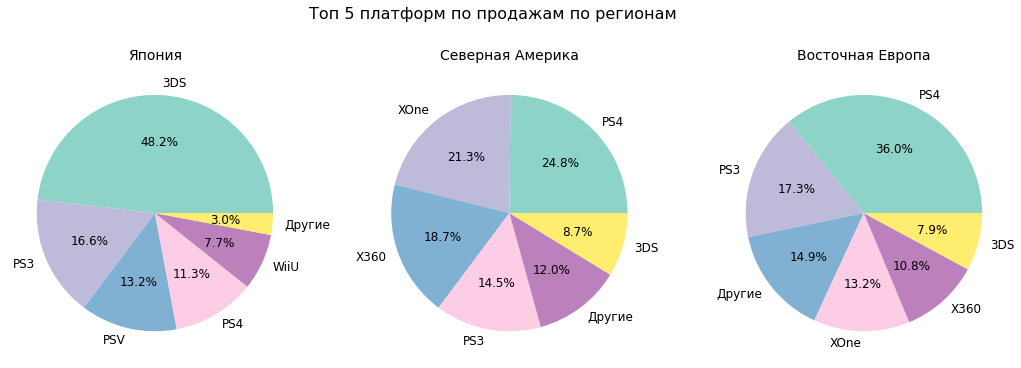

<Figure size 1296x720 with 0 Axes>

In [69]:
# Создадим диаграмму для сравнения платформ по регионам
# Генерация цветовой палитры
num_platform = len(jp_platform)
color_map_platform = plt.cm.get_cmap('Set3', num_platform)
bar_colors_platform = [color_map_platform(i) for i in np.linspace(0, 1, num_platform)]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))


plt.figure(figsize=(18, 10))
# Первая диаграмма (Япония)
axs[0].pie(
    jp_platform,
    labels=jp_platform.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[0].set_title('Япония', fontsize=14)

# Вторая диаграмма (Северная Америка)
axs[1].pie(
    na_platform, 
    labels=na_platform.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[1].set_title('Северная Америка', fontsize=14)

# Третья диаграмма (Восточная Европа)
axs[2].pie(
    eu_platform, 
    labels=eu_platform.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[2].set_title('Восточная Европа', fontsize=14)

# Общий заголовок
fig.suptitle('Топ 5 платформ по продажам по регионам', fontsize=16)


plt.show()


**Вывод :**
- В регионах NA и EU самой популярной платформой является PS4, а самой непопулярной (из первых 5) 3DS
- Напротив, в регионе JP, половина продаж приходится на 3DS, а PS4 находится на 4 месте. Также в пятерку входят PSV и WiiU, которые совсем не пользуются популярностью в других регионах
- Регионе NA популярными являются XOne и X360, в то время как в EU вторую строчку держит PS3

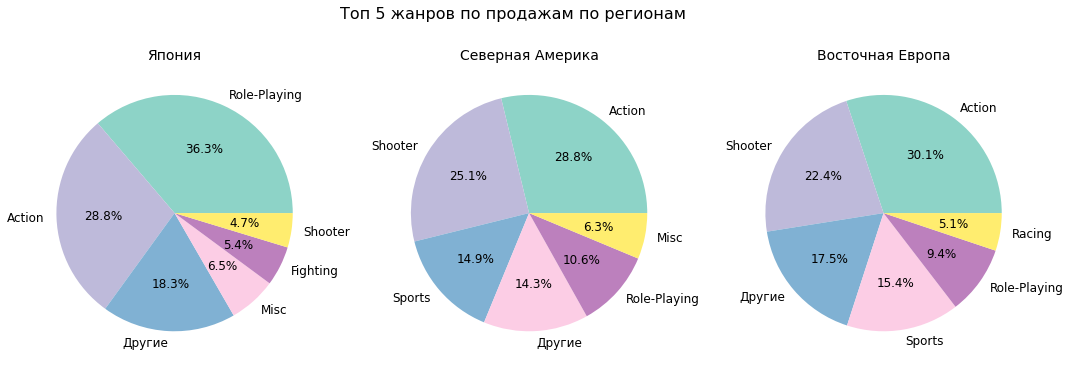

<Figure size 1296x720 with 0 Axes>

In [70]:
# Создадим диаграмму для сравнения жанров по регионам
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


plt.figure(figsize=(18, 10))
# Первая диаграмма (Япония)
axs[0].pie(
    jp_genre,
    labels=jp_genre.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[0].set_title('Япония', fontsize=14)

# Вторая диаграмма (Северная Америка)
axs[1].pie(
    na_genre, 
    labels=na_genre.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[1].set_title('Северная Америка', fontsize=14)

# Третья диаграмма (Восточная Европа)
axs[2].pie(
    eu_genre, 
    labels=eu_genre.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[2].set_title('Восточная Европа', fontsize=14)

# Общий заголовок
fig.suptitle('Топ 5 жанров по продажам по регионам', fontsize=16)


plt.show()


**Вывод :**
- Регионы NA и EU очень схожи: 
    1. На первом месте по жанрам находится Action, затем следуют Shooter, Sports и Role-Playing
    2. В Северной Америке на 5 строчке находится жанр Misc, в то время как эту строчку в восточной Европе занимает Racing
- Регион JP сильно выделяется:
    1. Жанр Role-Playing занимает с отрывом первую строчку, за ним следует также выделяющийся жанр Action
    2. Остальные жанры (Misc, Fighting и Shooter) значительно отстают от первых двух

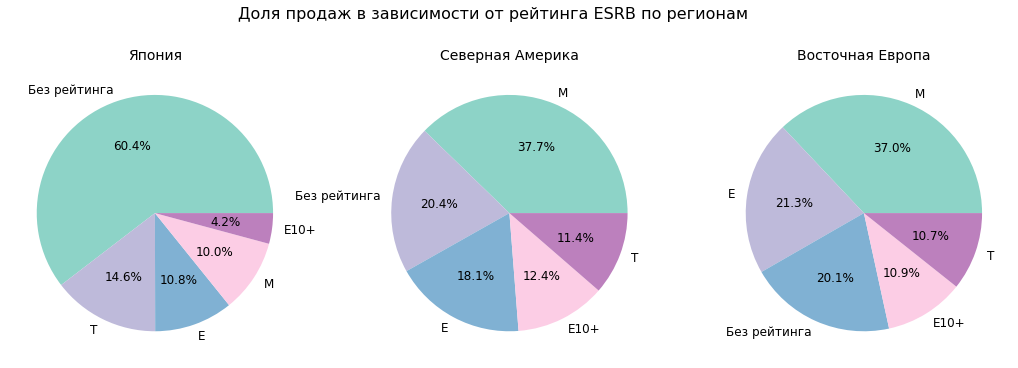

<Figure size 1296x720 with 0 Axes>

In [71]:
# Создадим диаграмму для сравнения жанров по регионам
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


plt.figure(figsize=(18, 10))
# Первая диаграмма (Япония)
axs[0].pie(
    jp_grouped,
    labels=jp_grouped.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[0].set_title('Япония', fontsize=14)

# Вторая диаграмма (Северная Америка)
axs[1].pie(
    na_grouped, 
    labels=na_grouped.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[1].set_title('Северная Америка', fontsize=14)

# Третья диаграмма (Восточная Европа)
axs[2].pie(
    eu_grouped, 
    labels=eu_grouped.index, 
    autopct='%.1f%%', 
    colors=bar_colors_platform, 
    textprops={'fontsize': 12}
)
axs[2].set_title('Восточная Европа', fontsize=14)

# Общий заголовок
fig.suptitle('Доля продаж в зависимости от рейтинга ESRB по регионам', fontsize=16)


plt.show()


**Вывод :**
- Регионы NA и EU очень схожи: 
    1. Чаще всего продаются игры с рейтингом М(для пользователей старше 17 лет), затем идут игрыбез рейтинга и с рейтингом Е(для всех или от 6 лет)
    2. Значительно отстают по продажам от предыдущих двух игры с рейтингом E10+(от 10 лет) и T(от 13 лет)
- Регион JP и тут очень отличается:
    1. Первое место по продажам с отрывом занимают игры без рейтинга с рейтингом T, затем , почти вровень, идут игры с рейтингом T, Е и М
    2. Игры с рейтингом E10+ отстают с отрывом

#### Общий вывод  по составлению портрета пользователя каждого региона

1. **Топ 5 платформ по продажам по регионам**
    - В регионах NA и EU самой популярной платформой является PS4, а самой непопулярной (из первых 5) 3DS
    - Напротив, в регионе JP, половина продаж приходится на 3DS, а PS4 находится на 4 месте. Также в пятерку входят PSV и WiiU, которые совсем не пользуются популярностью в других регионах
    - Регионе NA популярными являются XOne и X360, в то время как в EU вторую строчку держит PS3
2. **Топ 5 жанров по продажам по регионам**
    - Регионы NA и EU очень схожи: 
        1. На первом месте по жанрам находится Action, затем следуют Shooter, Sports и Role-Playing
        2. В Северной Америке на 5 строчке находится жанр Misc, в то время как эту строчку в восточной Европе занимает Racing
    - Регион JP сильно выделяется:
        1. Жанр Role-Playing занимает с отрывом первую строчку, за ним следует также выделяющийся жанр Action
        2. Остальные жанры (Misc, Fighting и Shooter) значительно отстают от первых двух
3. **Доля продаж в зависимости от рейтинга ESRB по регионам**
    - Регионы NA и EU очень схожи: 
        1. Чаще всего продаются игры с рейтингом М(для пользователей старше 17 лет), затем идут игры с рейтингом Е(для всех или от 6 лет)
        2. Значительно отстают по продажам от предыдущих двух игры с рейтингом E10+(от 10 лет) и T(от 13 лет)
    - Регион JP и тут очень отличается:
        1. Первое место по продажам занимают игры с рейтингом T, затем , почти вровень, идут игры с рейтингом Е и М
        2. Игры с рейтингом E10+ отстают с отрывом

### Проверка гипотез

#### Проверка гипотезы о равенстве средних пользовательских рейтингов платформ XOne и PC

**Нулевая гипотеза:** средние пользовательские рейтинги платформ XOne и PC равны

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ XOne и PC не равны

In [72]:
# Создадим отдельные переменные с информацией по платформам, выбросим строки с пропусками и переведем в тип данных float user_score
df_xone = (df_actual
           .query('platform == "XOne"')['user_score']
           .dropna()
           .astype('float')
)
df_pc = (df_actual
         .query('platform == "PC"')['user_score']
         .dropna()
         .astype('float')
)

In [73]:
# Применим t-тест для независимых выборок
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(df_xone, df_pc)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ XOne и PC не равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ XOne и PC равны') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ XOne и PC равны


In [74]:
print(f'Средний пользовательский рейтинг платформы XOne: {df_xone.mean()} \nСредний пользовательский рейтинг платформы PC: {df_pc.mean()}')

Средний пользовательский рейтинг платформы XOne: 6.521428571428572 
Средний пользовательский рейтинг платформы PC: 6.2696774193548395


**Вывод :**
- Средние пользовательские рейтинги платформ XOne и PC равны

#### Проверка гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports равны

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action и Sports не равны

In [75]:
# Создадим отдельные переменные с информацией по жанрам, выбросим строки с пропусками и переведем в тип данных float user_score
df_action = (df_actual
           .query('genre == "Action"')['user_score']
           .dropna()
           .astype('float')
)
df_sports = (df_actual
         .query('genre == "Sports"')['user_score']
         .dropna()
         .astype('float')
)

In [76]:
# Применим t-тест для независимых выборок
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(df_action, df_sports)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports не равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равны') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports не равны


In [77]:
print(f'Средний пользовательский рейтинг жанра Action: {df_action.mean()} \nСредний пользовательский рейтинг жанра Sports: {df_sports.mean()}')

Средний пользовательский рейтинг жанра Action: 6.837532133676092 
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


**Вывод :**
- Средние пользовательские рейтинги жанров Action и Sports не равны

#### Общий ввод по проверке гипотез

- Средние пользовательские рейтинги платформ XOne и PC равны
- Средние пользовательские рейтинги жанров Action и Sports не равны

### Общий вывод

1. **Предобработка данных**
    1. **Замена названий столбцов**

        - Названия столбцов приведены к нижнему регистру
    
    2. **Работа с пропусками**

        - Удадлили строки с пропусками в genre, name
        - Столбец year_of_release: имеет 1.61% пропущенных значений. Удалили эти строки
        - Пропуски в critic_score, user_score оставили.
        - Значение tbd в столбце user_score заменили на nan
        - Пропуски в rating заменили на 'Без рейтинга'
    
    3. **Работа с дубликатами**

        - В датафрейме нет явных дубликатов
        - В датафрейме нет неявных дубликатов
    
    4. **Подсчет суммарных продаж**

        - Добавлен столбец total_sales с суммарными продажами
2. **Исследовательский анализ данных**
    1. **Количество игр в разные годы**
        - С 2003 по 2016 год выпускалось наибольшее кол-во игр
        - Максимум наблюдался в 2008 - 1427 игр
    2. **Динамика продаж игр по платформам**
        - Продажи игр на PS2 стартовали в 2000 и закончились в 2011, максимум в 2004 году
        - Продажи игр на Х360 стартовали в 2005 и падают с 2010, минимум в 2016 году
        - Продажи игр на PS3 стартовали в 2006 и падают с 2011, минимум в 2016 году
        - Продажи игр на DS стартовали в 2004 и закончились в 2013
        - Продажи игр на Wii стартовали в 2006 и падают с 2009, продажи закончились в 2015 году
        - Данные платформы живут от 9 до 11 лет
    3. **Динамика выпуска игр по платформам**
        - PS2 и DS лидируют со значительным отрывом
        - PC, PS, PSP, X360, Wii, PS3 имеют большое кол-во продаж игр
        - XB и GBA немного отстают
        - Выпуск игр на PS2 стартовал в 2000 и закончился в 2011
        - Выпуск игр на DS стартовал в 2004 и закончился в 2013
        - Выпуск игр на PC стартовал в 1985 и не закончился до сих пор
        - Выпуск игр на PS стартовал в 1994 и закончился в 2003
        - Выпуск игр на PSP стартовал в 2004 и резко упал в 2015
        - Выпуск игр на Х360 стартовал в 2005 и падает с 2011
        - Выпуск игр на Wii стартовал в 2006 и падает с 2009
        - Выпуск игр на PS3 стартовал в 2006 и падает с 2011
        - Выпуск игр на ХВ стартовал в 2000 и закончился в 2007
        - Выпуск игр на GBA стартовал в 2000 и закончился в 2007
    4. **Выбор актуального периода**
        - Актуальным периодом будем считать данные с 2013 года. **Остальные вывод сделаны на основании этого периода**
    5. **Лидирующие платформы**
        - Наибольший интерес представляют PS4 и XOne в связи со своей положительной динамикой и лидирующими позициями по продажам
        - X360, WiiU, Wii, PSP, PS3, 3DS, PSV имеют отрицательную динамику
    6.  **Оценка статистики продаж по диаграммам размаха**
        - Медиана глобальных продаж игр на WiiU, Wii, DS, XOne, PS4, PS3 очень близка и находится в диапазоне [0.15; 0.22]
        - Медиана глобальных продаж игр на PSP, PSV, PC наименьшая 0.02, 0.04 и 0.08 соответственно
        - Медиана глобальных продаж игр на X360 наибольшая - 0.265
    7. **Влияние отзывов пользователей и критиков на продажи внутри платформы PS4**
        - Видна корреляция между суммарными продажами и отзывами критиков внутри платформы PS4: 0.4
        - Зависимости не проглядывается до оценок критиков = 50, затем видно явное повышение количества крупных продаж игр
        - Корреляции между суммарными продажами и отзывами пользователей внутри платформы PS4 нет : -0.03
        - Крупных продаж игр с пользовательскими оценками выше 4 значительно больше
        - Основные продажи находятся в области с пользовательскими оценками [6:8] и в области с оценками критиков [60:90]
        - Будем считать, что эти выводы можно экстраполировать и на другие платформы
    8. **Влияние отзывов пользователей и критиков на продажи внутри платформы XOne**
        - Видна корреляция между суммарными продажами и отзывами критиков внутри платформы XOne: 0.41
        - Зависимости не проглядывается до оценок критиков = 50, затем видно явное повышение количества крупных продаж игр
        - Корреляции между суммарными продажами и отзывами пользователей внутри платформы XOne нет : -0.09
        - Крупных продаж игр с пользовательскими оценками выше 4 значительно больше
        - Основные продажи находятся в области с пользовательскими оценками [6:8] и в области с оценками критиков [60:90]
    8. **Влияние отзывов пользователей и критиков на продажи внутри платформы 3DS**
        - Видна корреляция между суммарными продажами и отзывами критиков внутри платформы 3DS: 0.34
        - Зависимости не проглядывается до оценок критиков = 50, затем видно явное повышение количества крупных продаж игр
        - Видна слабая корреляция между суммарными продажами и отзывами пользователей внутри платформы 3DS : 0.27
        - Крупных продаж игр с пользовательскими оценками выше 5 значительно больше
        - Основные продажи находятся в области с пользовательскими оценками [6:8] и в области с оценками критиков [60:90]
        
        **Так как выводы между тремя платформами почти совпадают, будем считать, что эти выводы можно экстраполировать и на другие платформы**
    9. **Общее распределение игр по жанрам**
       - Самыми прибыльными жанрами оказались : 
            - Shooter - 0.45 млн 
            - Sports - 0.240 млн
            - Platform - 0.225 млн 
    
        Данные жанры значительно опережают остальные, что говорит о большом интересе пользователей к этим жанрам игр
        - Жанры с наименьшим количеством продаж:
            - Adventure - 0.03 млн
            - Puzzle - 0.06 млн
    
        Данные жанры значительно отстают от остальных, что говорит о безразличии пользователей к этим жанрам игр
        
3. **Составление портрета пользователя каждого региона**
    1. **Топ 5 платформ по продажам по регионам**
        - В регионах NA и EU самой популярной платформой является PS4, а самой непопулярной (из первых 5) 3DS
        - Напротив, в регионе JP, половина продаж приходится на 3DS, а PS4 находится на 4 месте. Также в пятерку входят PSV и WiiU, которые совсем не пользуются популярностью в других регионах
        - Регионе NA популярными являются XOne и X360, в то время как в EU вторую строчку держит PS3
    2. **Топ 5 жанров по продажам по регионам**
        - Регионы NA и EU очень схожи: 
            1. На первом месте по жанрам находится Action, затем следуют Shooter, Sports и Role-Playing
            2. В Северной Америке на 5 строчке находится жанр Misc, в то время как эту строчку в восточной Европе занимает Racing
        - Регион JP сильно выделяется:
            1. Жанр Role-Playing занимает с отрывом первую строчку, за ним следует также выделяющийся жанр Action
            2. Остальные жанры (Misc, Fighting и Shooter) значительно отстают от первых двух
        3. **Доля продаж в зависимости от рейтинга ESRB по регионам**
            - Регионы NA и EU очень схожи: 
                1. Чаще всего продаются игры с рейтингом М(для пользователей старше 17 лет), затем идут игрыбез рейтинга и с рейтингом Е(для всех или от 6 лет)
                2. Значительно отстают по продажам от предыдущих двух игры с рейтингом E10+(от 10 лет) и T(от 13 лет)
            - Регион JP и тут очень отличается:
                1. Первое место по продажам с отрывом занимают игры без рейтинга с рейтингом T, затем , почти вровень, идут игры с рейтингом T, Е и М
                2. Игры с рейтингом E10+ отстают с отрывом
4. **Проверка гипотез**
    - Средние пользовательские рейтинги платформ XOne и PC равны
    - Средние пользовательские рейтинги жанров Action и Sports не равны